In [1]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os
import repackage
repackage.up()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
import analysis2 as a2
from IPython.display import display, HTML
sys.path.append('/home/janekg89/Develop/Pycharm_Projects/flutype_webapp')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "flutype_webapp.settings")
import django
django.setup()
from flutype.models import Spot
import preprocessing as pre
#from preprocessing import mean_on_analyte_batch, 
import seaborn as sns
from itertools import combinations

import matplotlib.cm as cm


/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


****************************************
RUNNING IN DEVELOP
****************************************


In [41]:

#cs = ["slide_21","slide_22","slide_ 26","slide_27","slide_31","slide_32","slide_36","slide_23","slide_28","slide_33","slide_37"]


In [42]:
studies = ["microarray_2018_03_21"]
spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__studies__sid__in=studies)
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")
#spots_dj = spots_dj.filter(circle_quality__gte = 0.3)
cs = ["2018_03_21_slide_31",]
spots_dj =  spots_dj.exclude(raw_spot__raw_spot_collection__sid__in=cs)
data = a2.Data(spots_dj=spots_dj).outlier_filtering()

In [43]:
mean_on_anlyte_batch = data.mean_on_analyte_batch()
mean_spots_grouped = mean_on_anlyte_batch.groupby("Analyte Batch")
grouped_combinations = combinations(mean_spots_grouped,2)

In [44]:
peptide_c_signif = data.ligand_batch_significance()


In [45]:
peptide_c_signif.groupby("Ligand Batch").apply(lambda x: x["Significance"].min()).sort_values()

Ligand Batch
LF-0.1       7.905050e-323
LF-0.05      7.619178e-112
P084          2.883058e-63
P102          1.007026e-58
P125          1.993394e-58
P063          4.212757e-56
P090          4.734148e-56
P116          9.508404e-55
Nenad         1.476825e-51
P068          2.661893e-50
P104          5.722089e-50
P132          2.927729e-49
P123          4.032941e-49
P010          1.945966e-46
P081          1.983807e-46
P124          2.615372e-46
P103          1.358502e-45
P065          2.105687e-45
P100          2.434754e-45
P128          3.494074e-45
P076          3.569791e-45
LF-0.0001     8.818758e-45
P088          3.519792e-44
P056          3.569657e-44
P095          5.418106e-44
P115          1.740068e-43
P101          1.891800e-43
P091          2.164484e-43
P070          2.568702e-43
P060          2.602667e-43
                 ...      
P130          2.164730e-38
P121          3.567030e-38
P127          5.117579e-38
P114          6.476614e-38
P083          7.950251e-38
P045.3        1

In [46]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [47]:
data.spots_pd

Ligand Batch  Ligand Batch Concentration Ligand  \
24898    LF-0.0001                      0.0001     LF   
24991    LF-0.0001                      0.0001     LF   
25084    LF-0.0001                      0.0001     LF   
25177    LF-0.0001                      0.0001     LF   
25270    LF-0.0001                      0.0001     LF   
25363    LF-0.0001                      0.0001     LF   
25456    LF-0.0001                      0.0001     LF   
25549    LF-0.0001                      0.0001     LF   
25642    LF-0.0001                      0.0001     LF   
13876    LF-0.0001                      0.0001     LF   
13969    LF-0.0001                      0.0001     LF   
14062    LF-0.0001                      0.0001     LF   
14155    LF-0.0001                      0.0001     LF   
14248    LF-0.0001                      0.0001     LF   
14341    LF-0.0001                      0.0001     LF   
14434    LF-0.0001                      0.0001     LF   
14527    LF-0.0001                      0.0001     LF   
1906     LF-0.0001                      0.0001     LF   
2092     LF-0.0001                      0.0001     LF   
2185     LF-0.0001                      0.0001     LF   
2278     LF-0.0001                      0.0001     LF   
2371     LF-0.0001                      0.0001     LF   
2464     LF-0.0001                      0.0001     LF   
2557     LF-0.0001                      0.0001     LF   
12928    LF-0.0001                      0.0001     LF   
13021    LF-0.0001                      0.0001     LF   
13114    LF-0.0001                      0.0001     LF   
13207    LF-0.0001                      0.0001     LF   
13300    LF-0.0001                      0.0001     LF   
13393    LF-0.0001                      0.0001     LF   
...            ...                         ...    ...   
6619          P136                      1.0000   P136   
6712          P136                      1.0000   P136   
6805          P136                      1.0000   P136   
9481          P136                      1.0000   P136   
9574          P136                      1.0000   P136   
9667          P136                      1.0000   P136   
9760          P136                      1.0000   P136   
9853          P136                      1.0000   P136   
9946          P136                      1.0000   P136   
10039         P136                      1.0000   P136   
10132         P136                      1.0000   P136   
10225         P136                      1.0000   P136   
8626          P136                      1.0000   P136   
8719          P136                      1.0000   P136   
8812          P136                      1.0000   P136   
8905          P136                      1.0000   P136   
8998          P136                      1.0000   P136   
9091          P136                      1.0000   P136   
9184          P136                      1.0000   P136   
9277          P136                      1.0000   P136   
9370          P136                      1.0000   P136   
31711         P136                      1.0000   P136   
31804         P136                      1.0000   P136   
31897         P136                      1.0000   P136   
31990         P136                      1.0000   P136   
32083         P136                      1.0000   P136   
32176         P136                      1.0000   P136   
32269         P136                      1.0000   P136   
32362         P136                      1.0000   P136   
32455         P136                      1.0000   P136   

                                Analyte Batch                      Analyte  \
24898        A/Perth/16/2009(H3N2)-2018-04-13        A/Perth/16/2009(H3N2)   
24991        A/Perth/16/2009(H3N2)-2018-04-13        A/Perth/16/2009(H3N2)   
25084        A/Perth/16/2009(H3N2)-2018-04-13        A/Perth/16/2009(H3N2)   
25177        A/Perth/16/2009(H3N2)-2018-04-13        A/Perth/16/2009(H3N2)   
25270        A/Perth/16/2009(H3N2)-2018-04-13        A/Perth/16/2009(H3N2)   
253

In [56]:
studies = ["microarray_2018_03_21"]
spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__studies__sid__in=studies)
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")
#spots_dj = spots_dj.filter(circle_quality__gte = 0.3)
cs = ["2018_03_21_slide_31",]
spots_dj =  spots_dj.exclude(raw_spot__raw_spot_collection__sid__in=cs)
data = a2.Data(spots_dj=spots_dj)

0


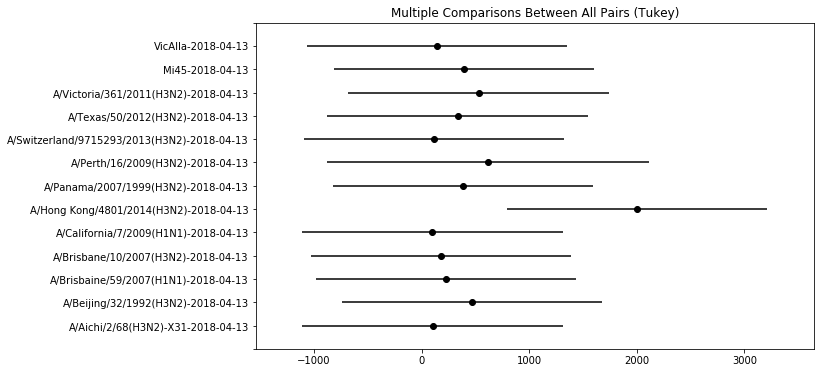

0


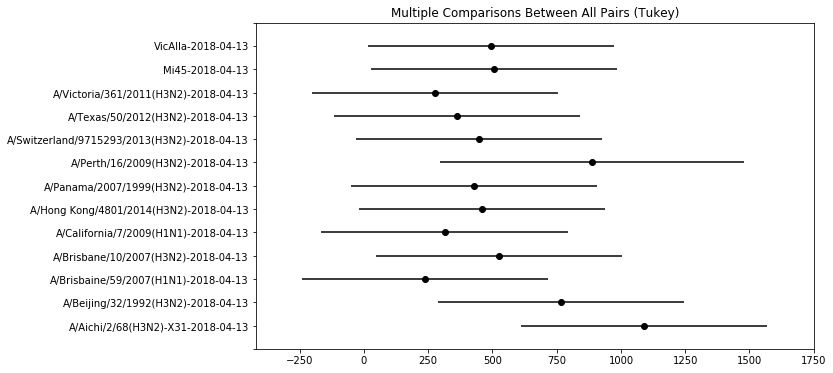

0


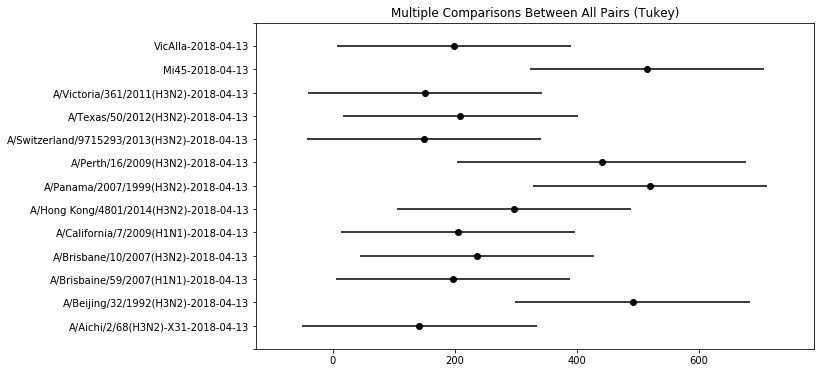

0


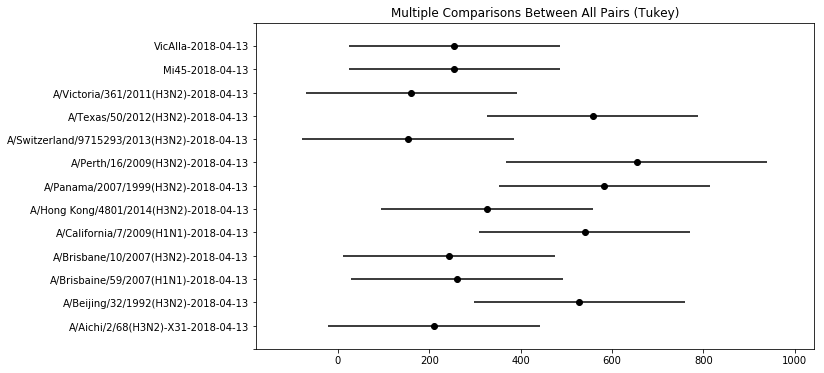

28


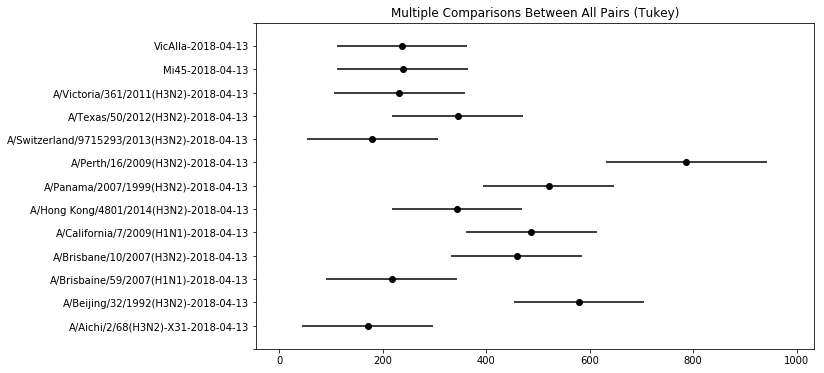

0


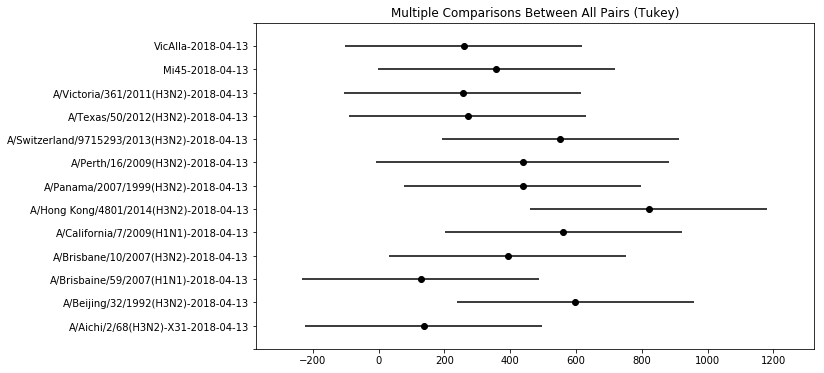

42


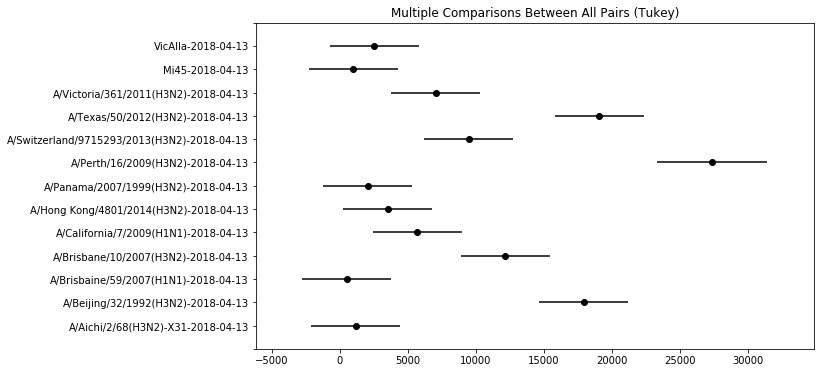

13


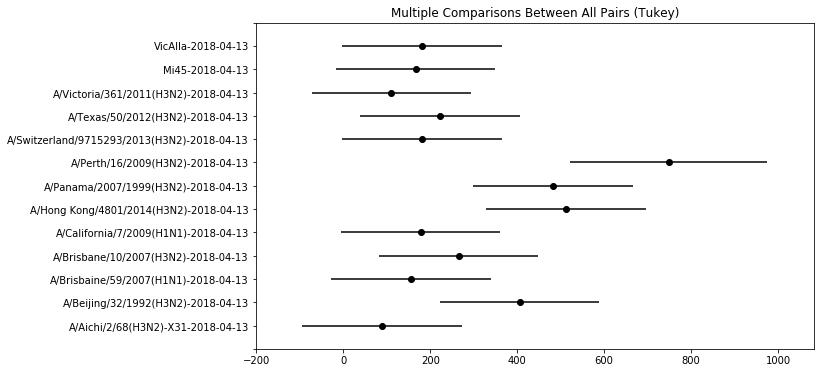

4


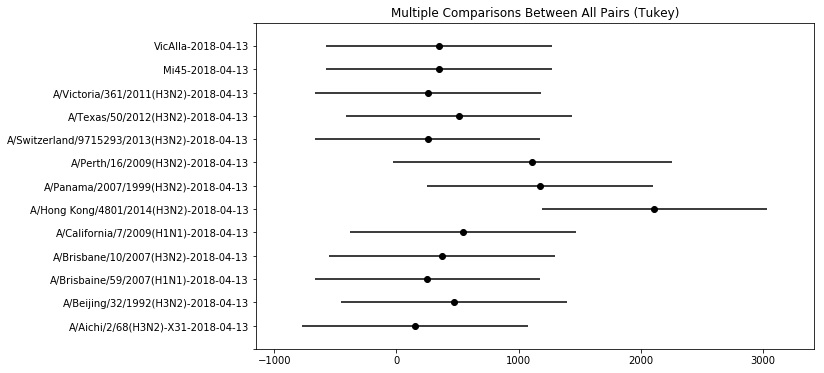

0


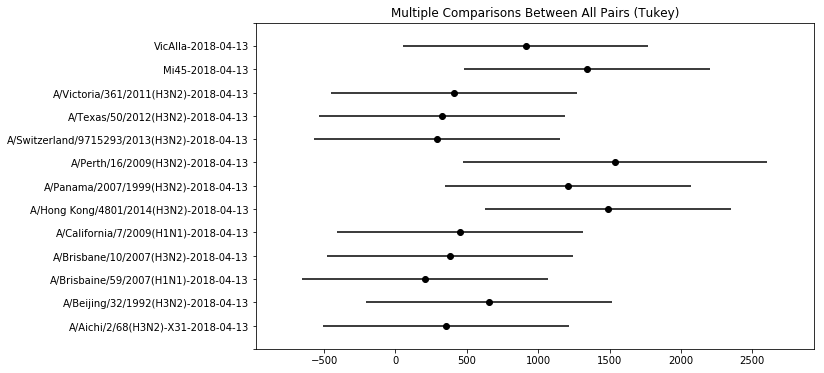

12


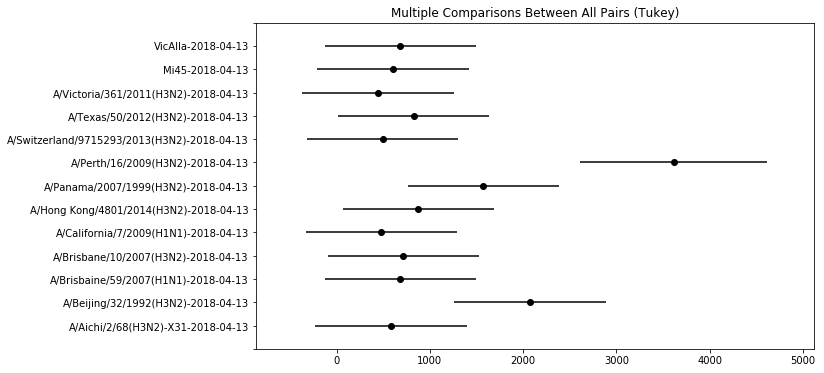

25


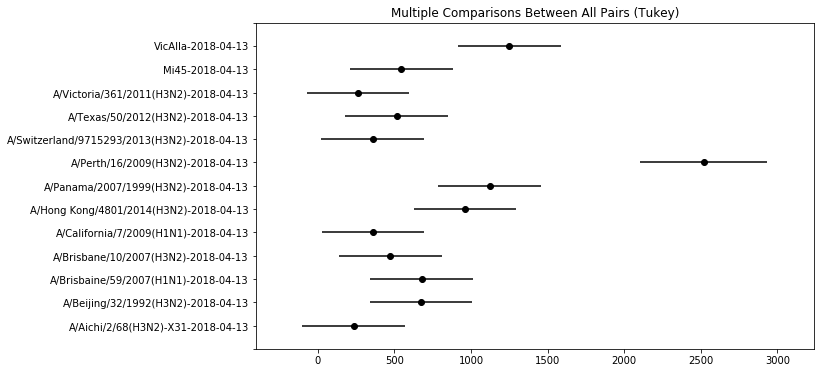

12


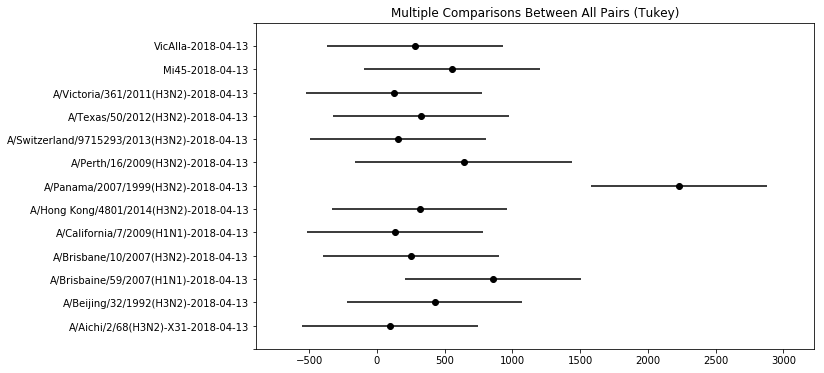

34


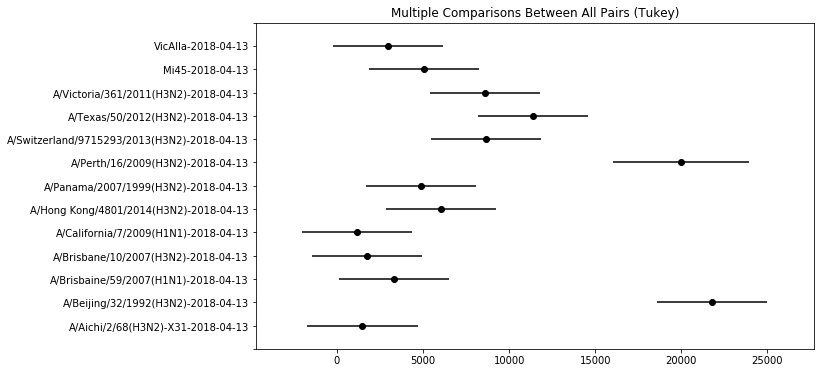

30


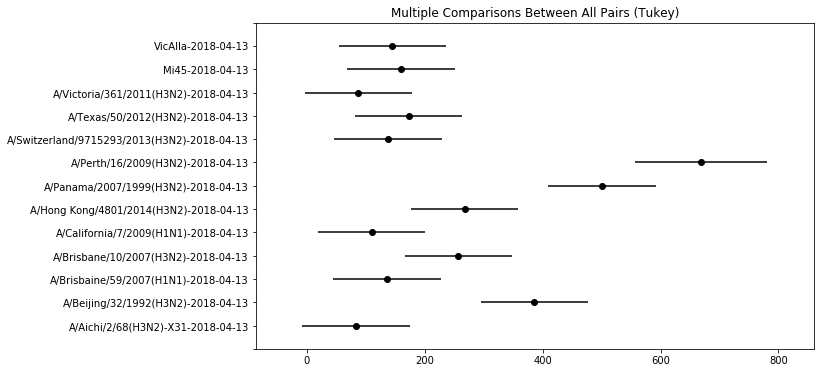

10


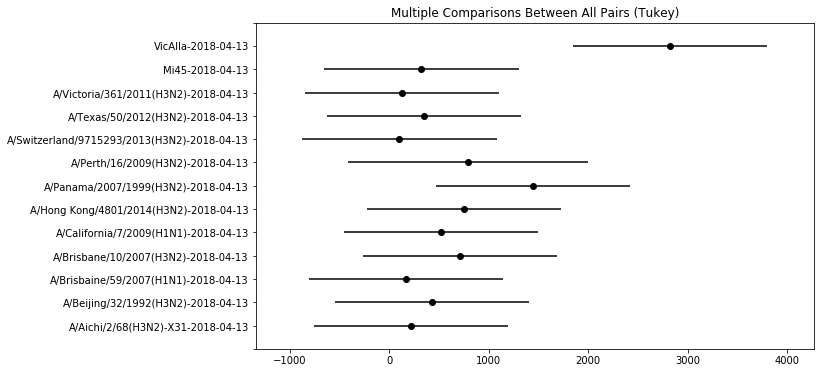

9


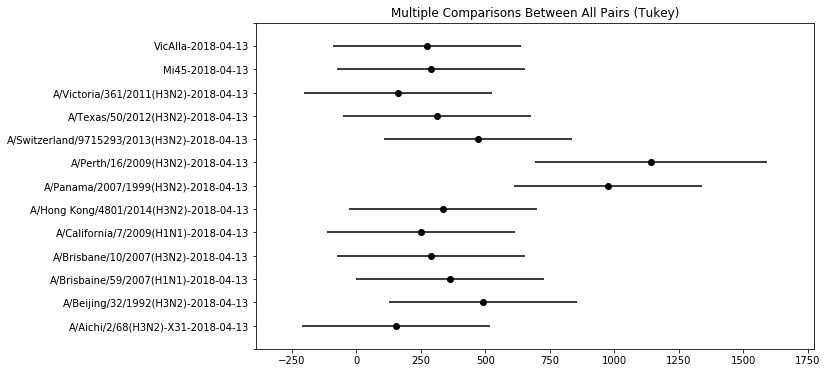

18


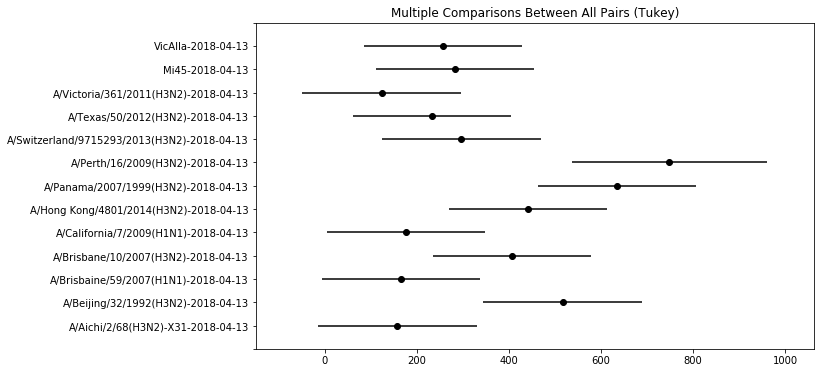

14


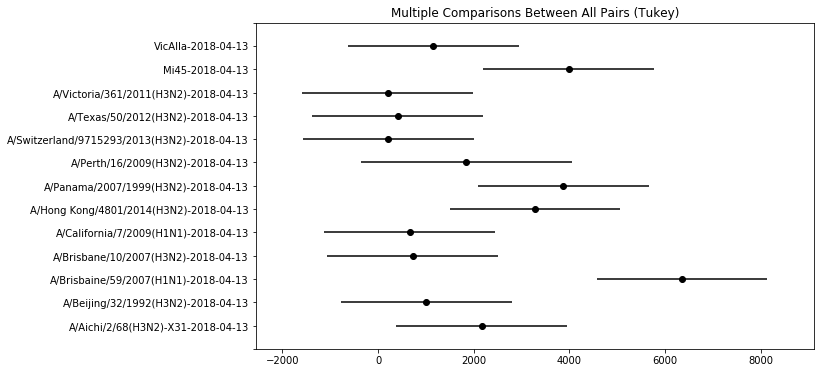

25


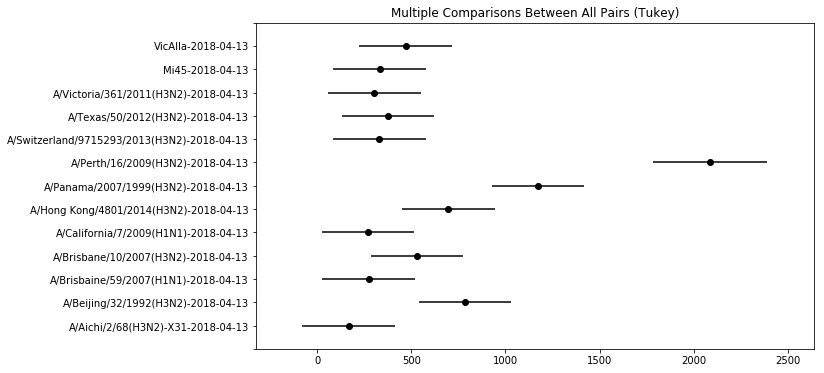

12


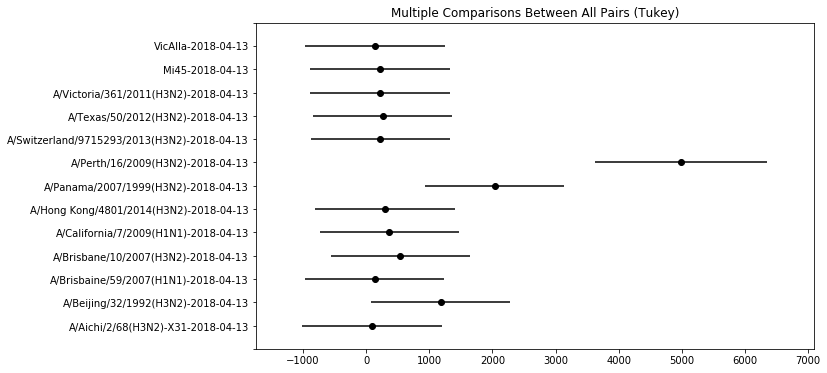

30


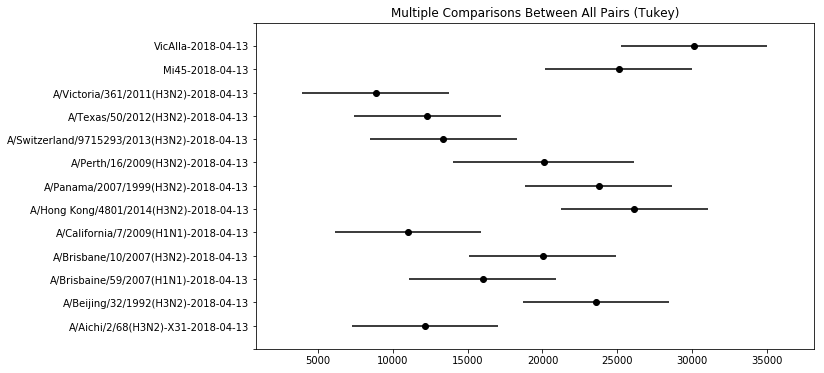

27


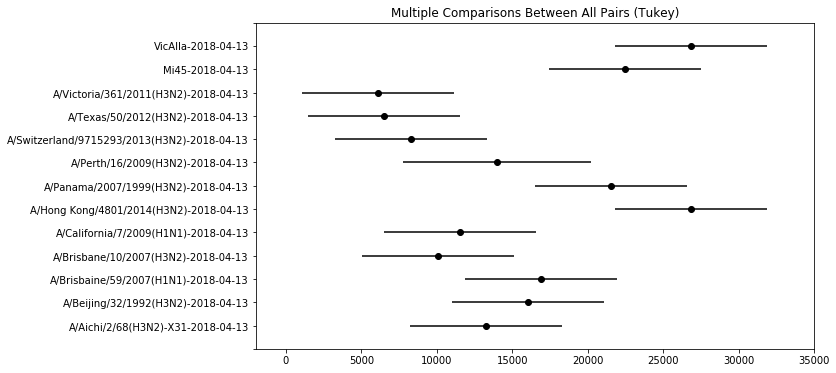

21


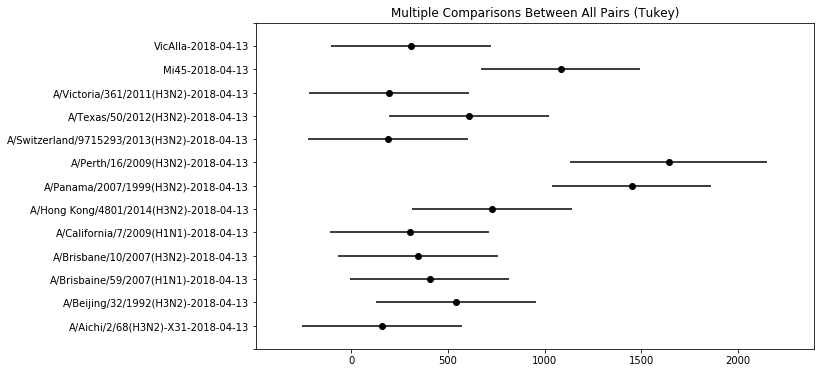

17


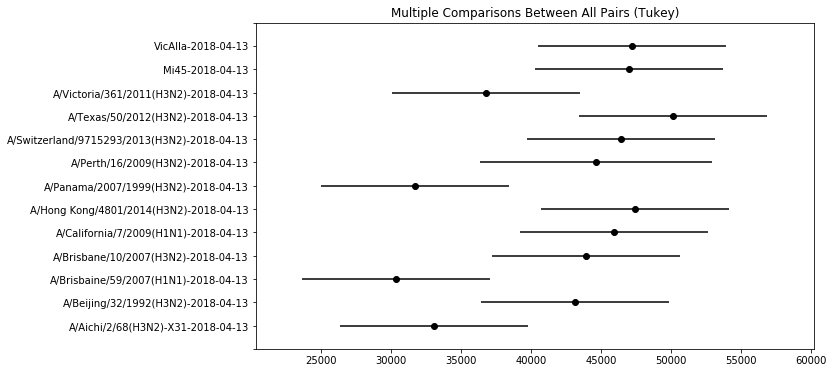

23


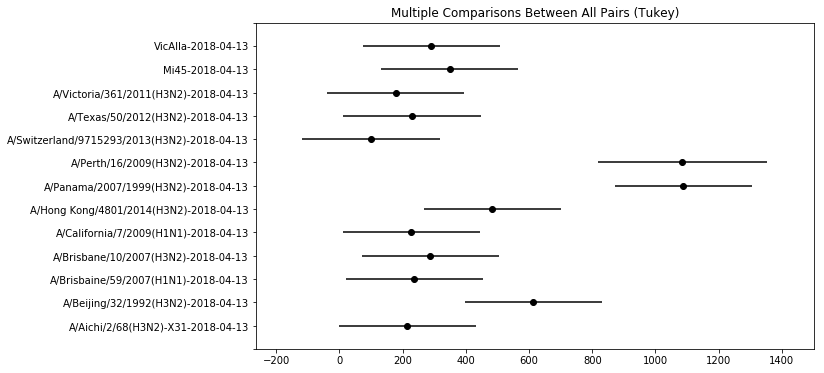

32


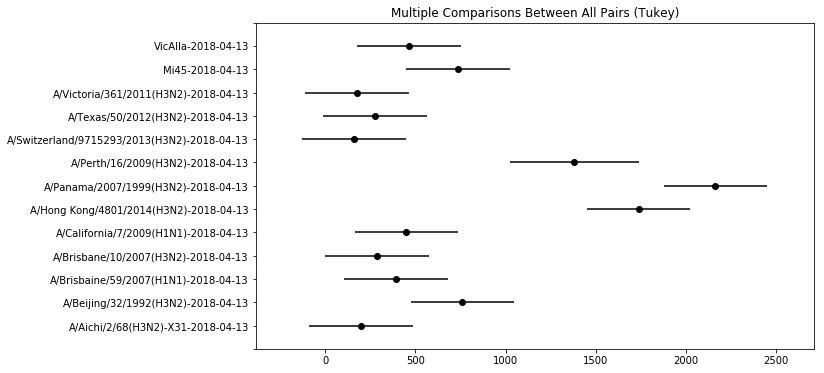

37


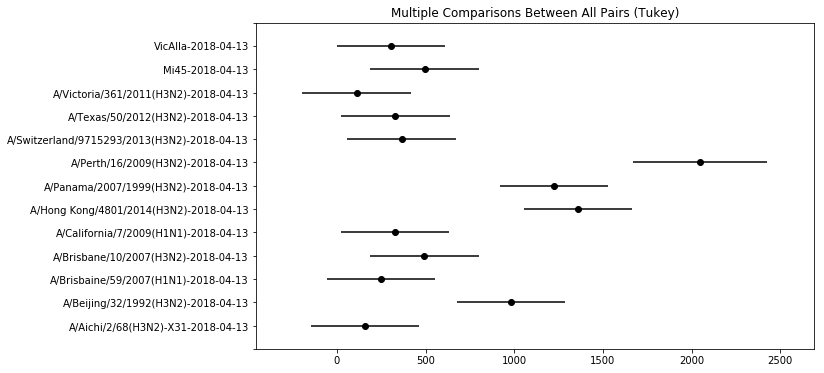

32


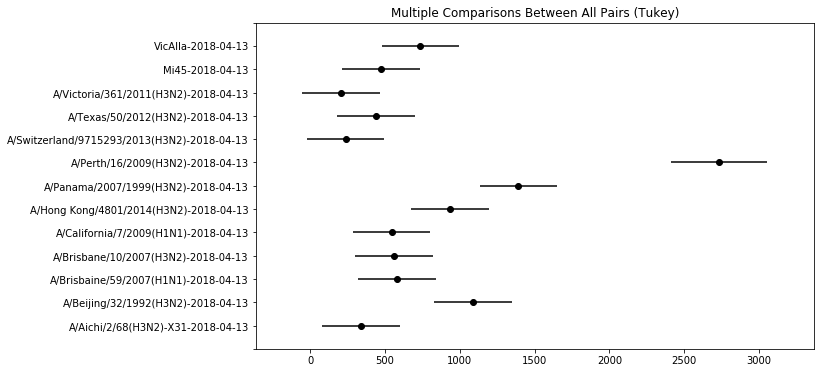

25


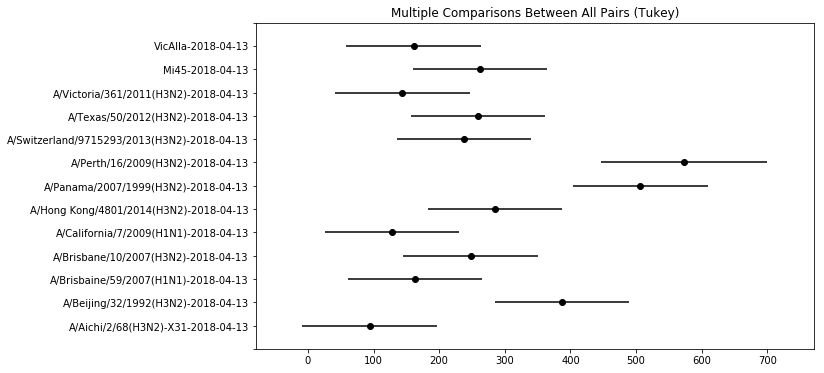

22


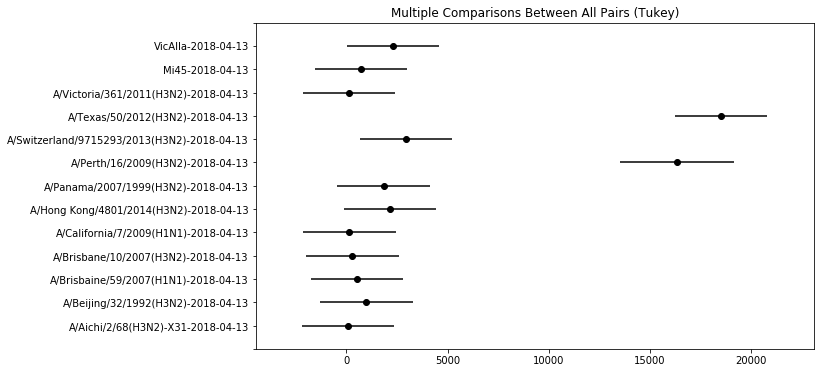

24


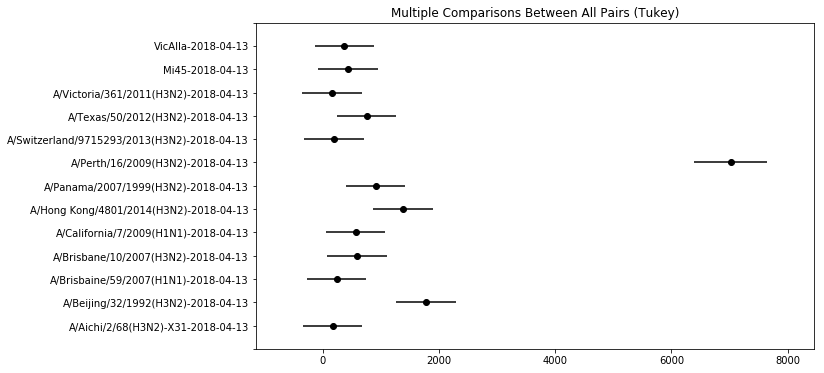

34


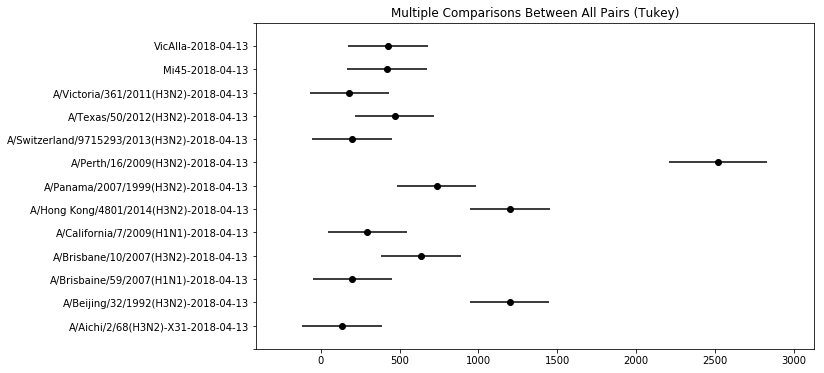

37


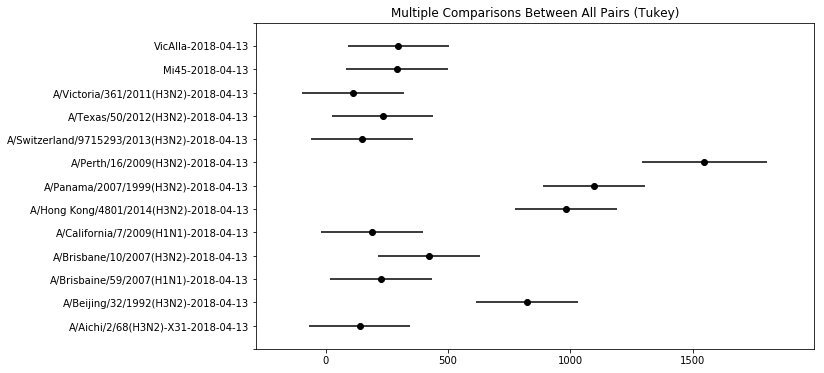

38


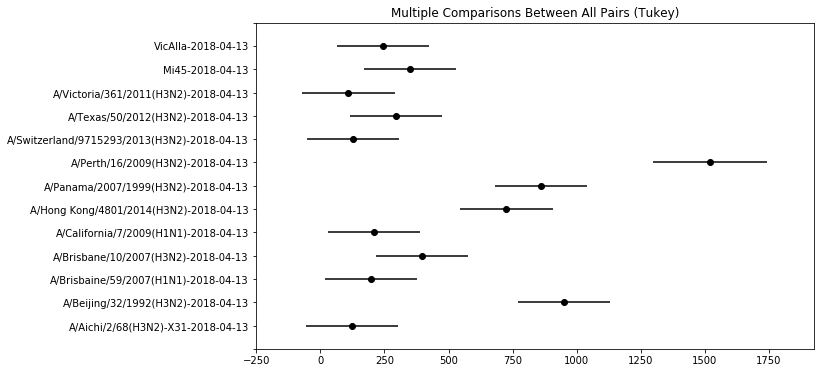

0


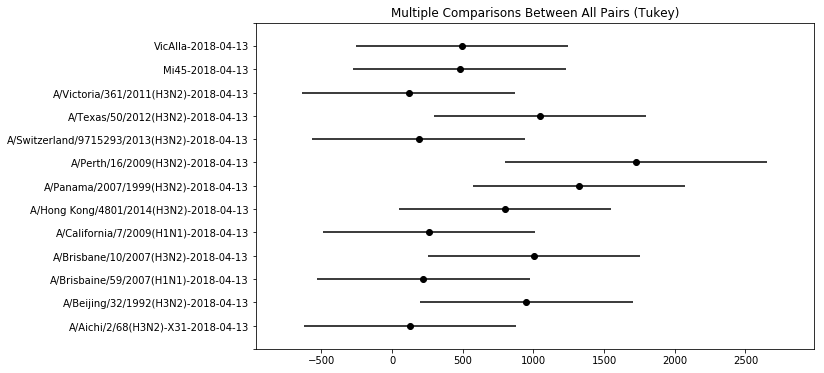

36


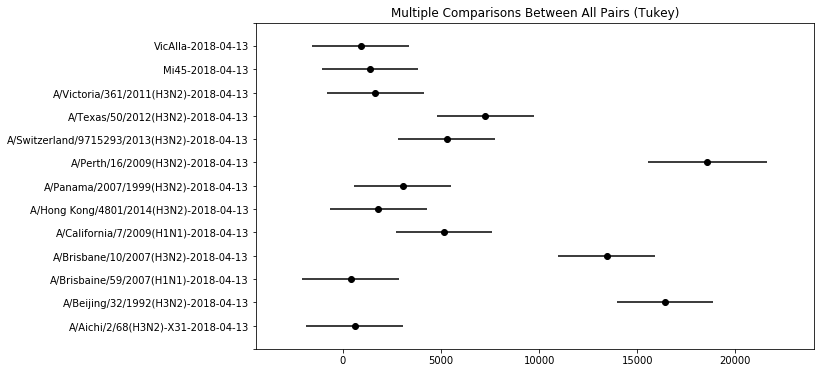

0


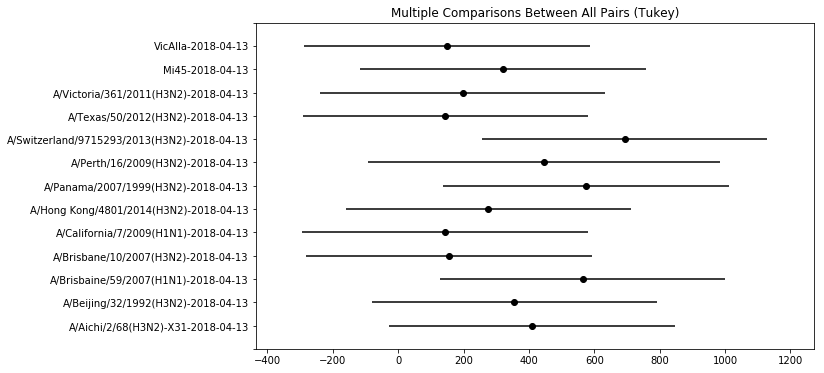

8


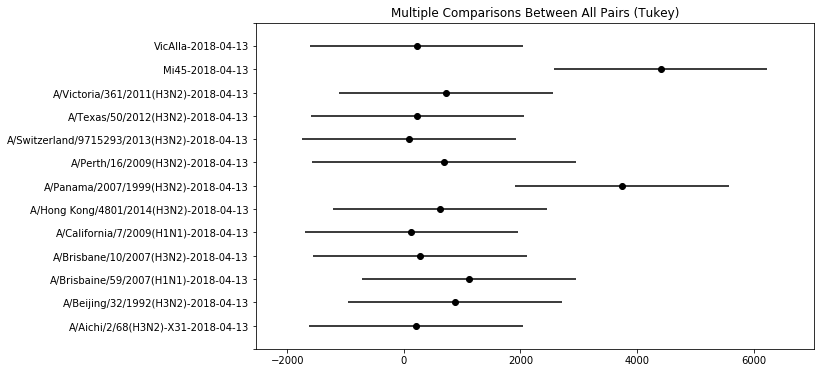

6


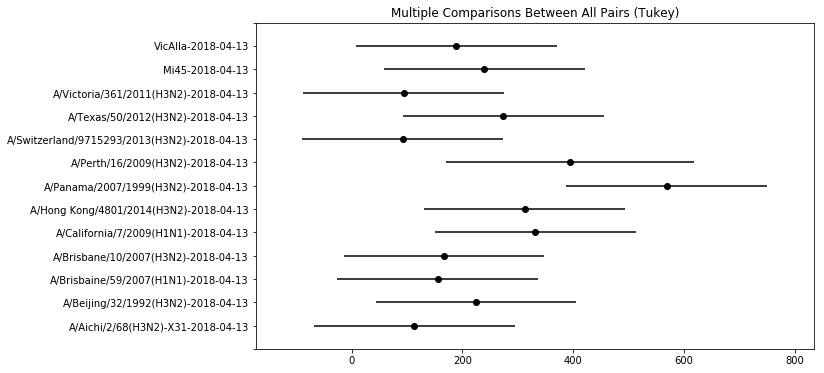

16


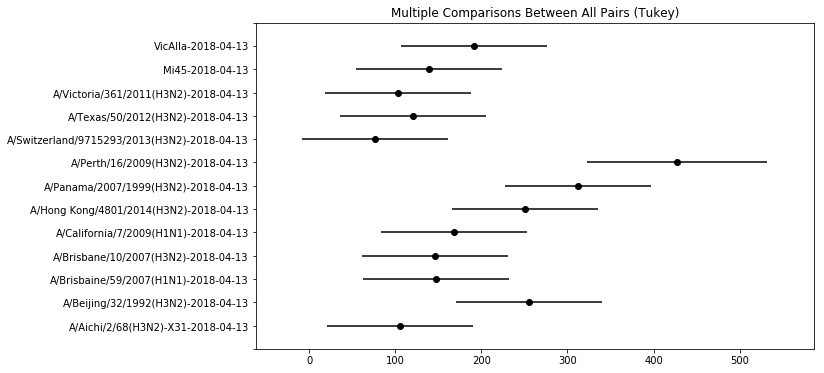

28


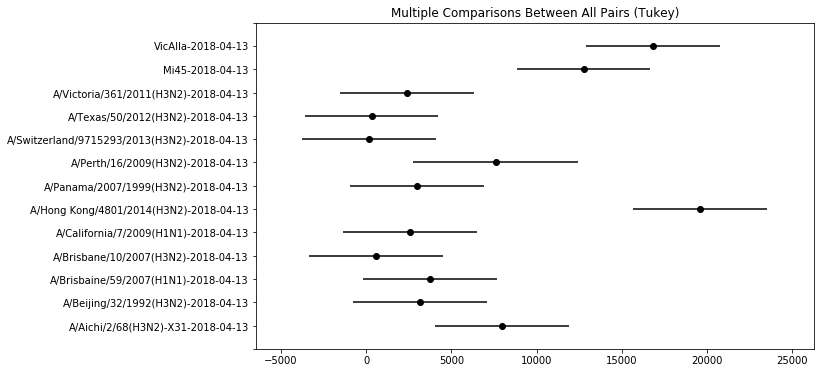

12


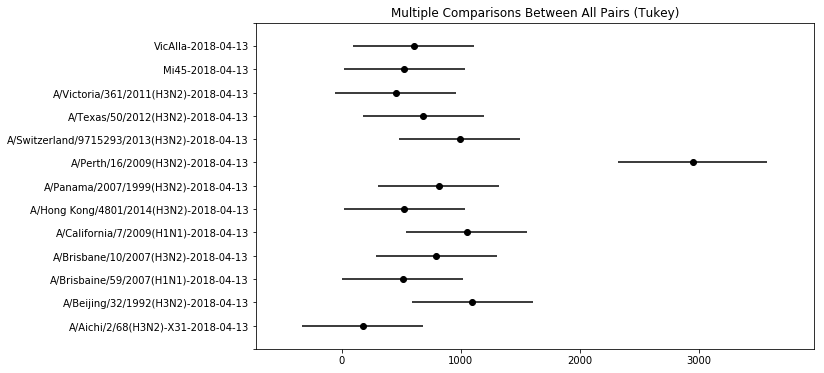

29


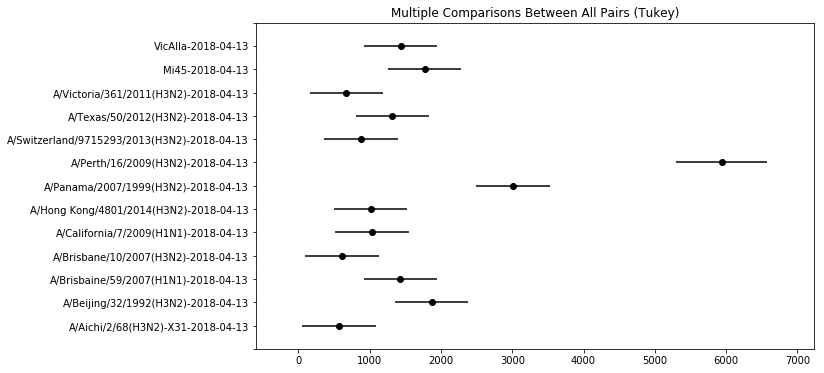

28


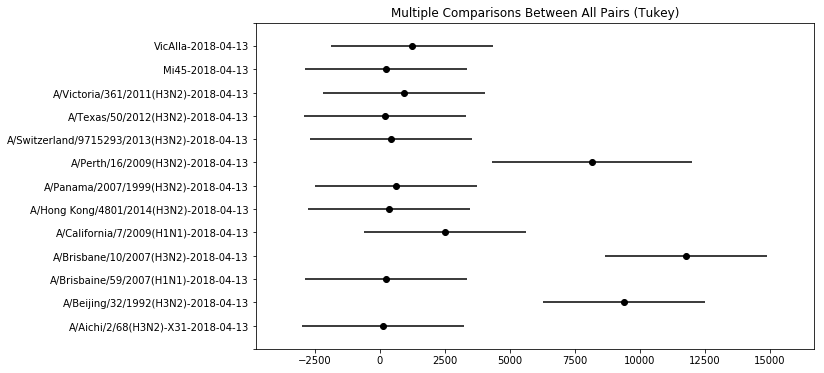

45


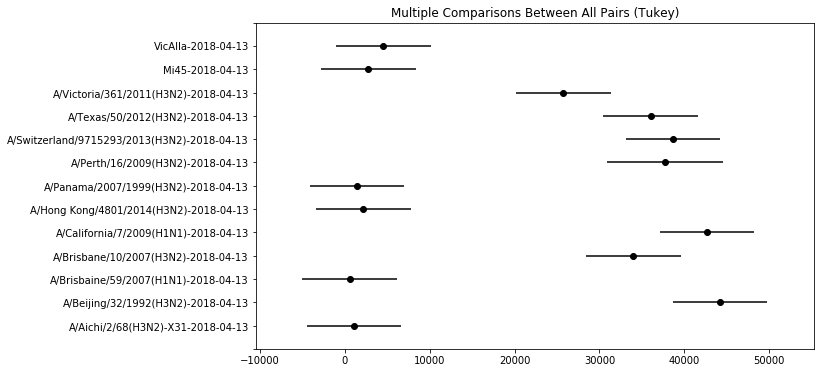

12


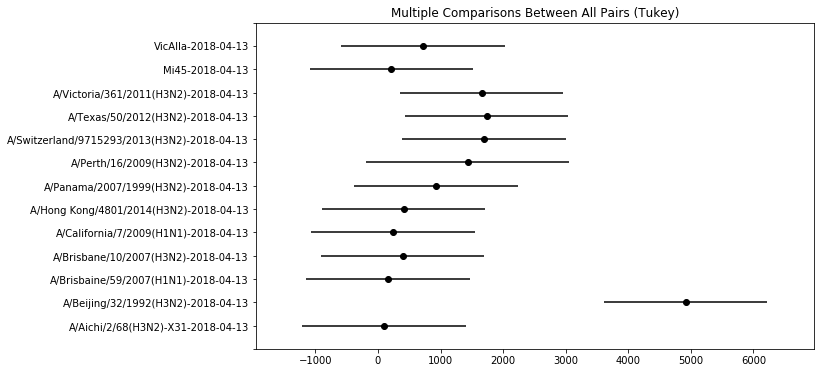

19


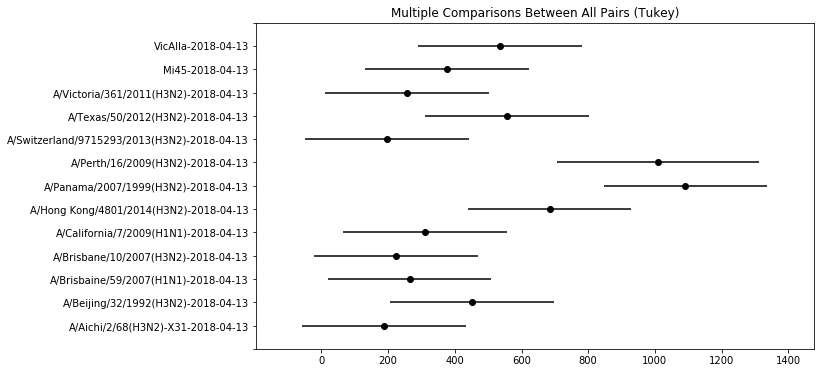

12


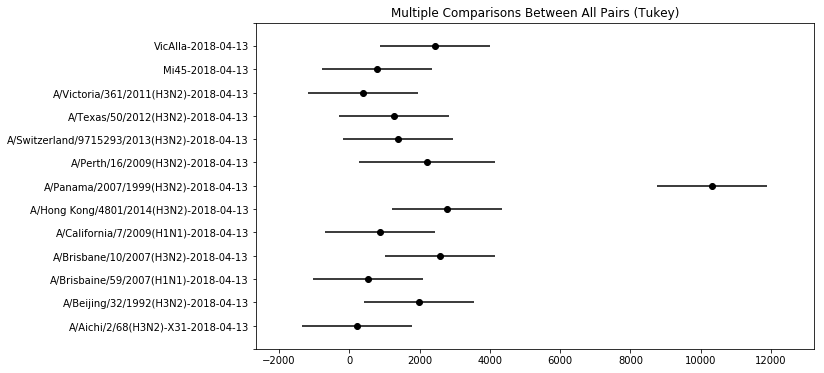

22


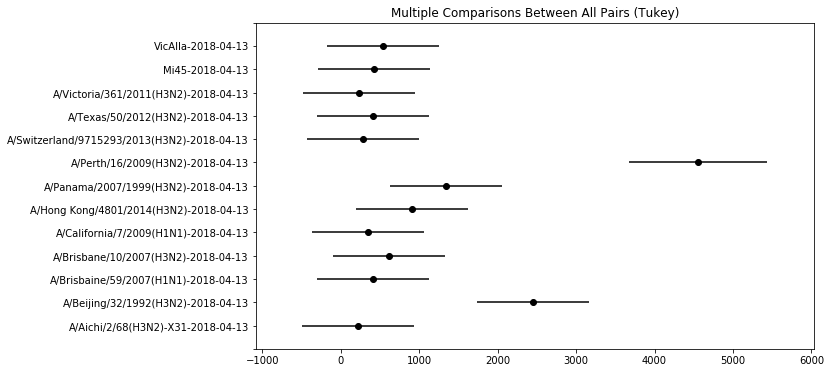

0


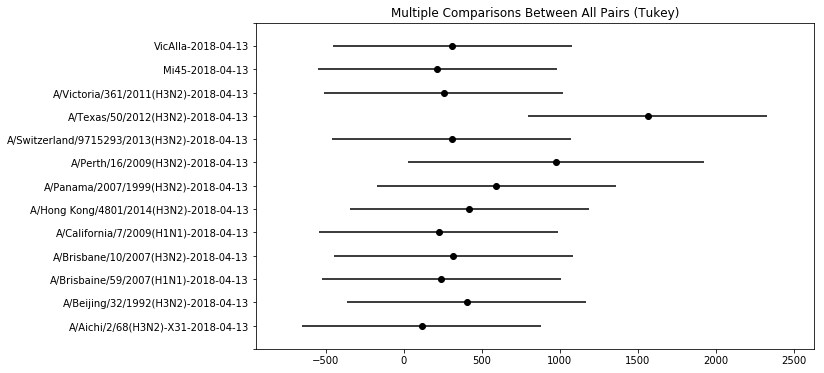

12


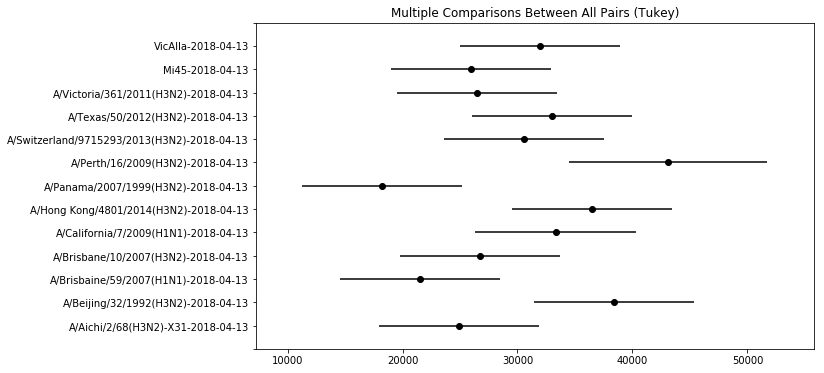

12


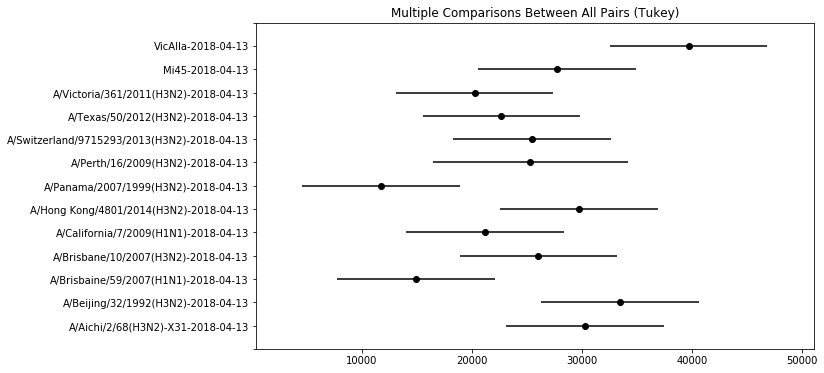

16


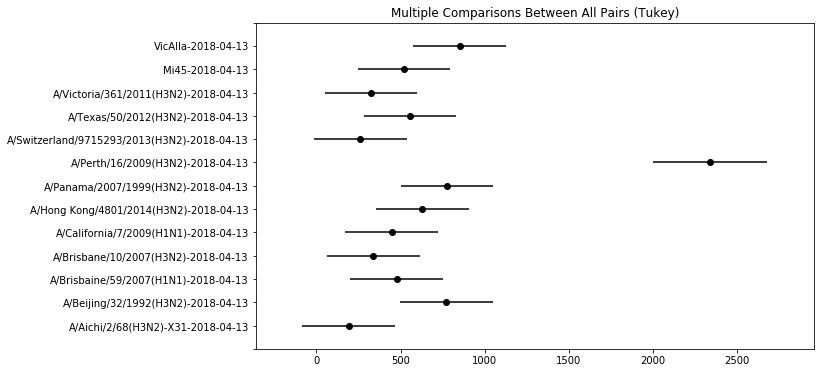

17


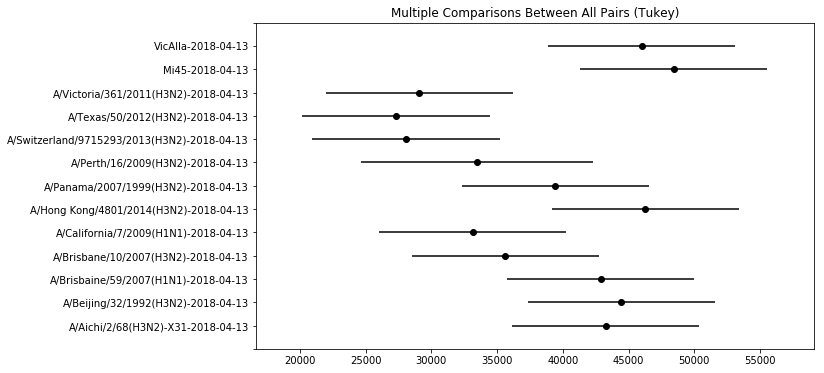

31


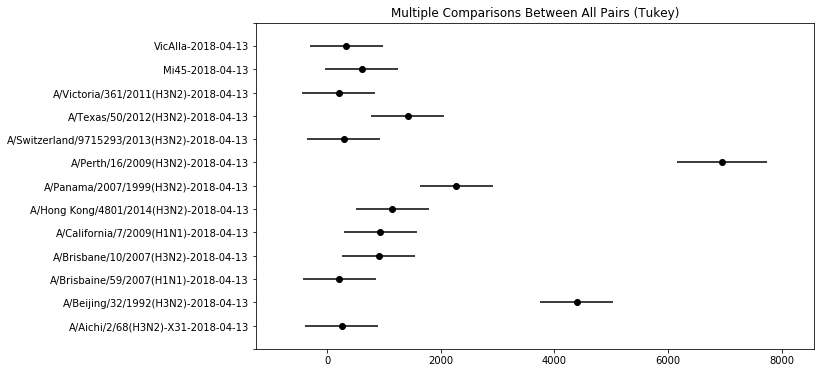

39


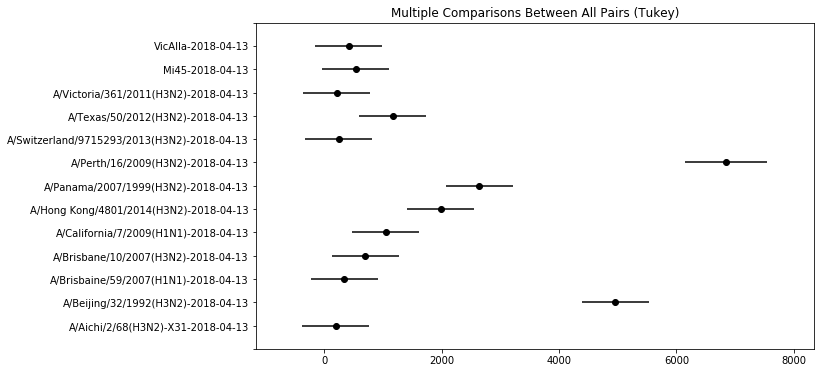

22


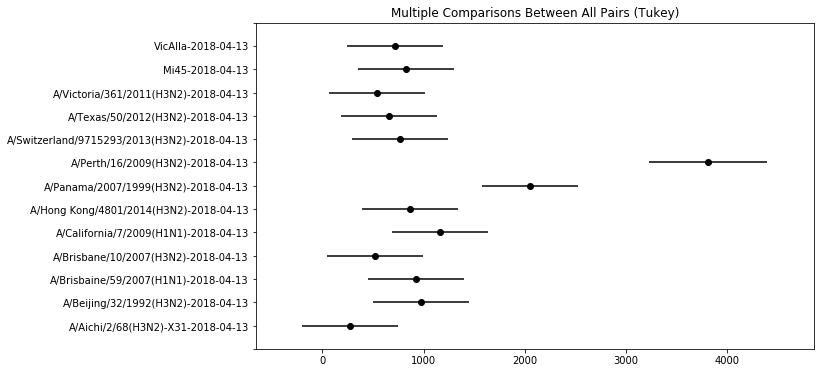

46


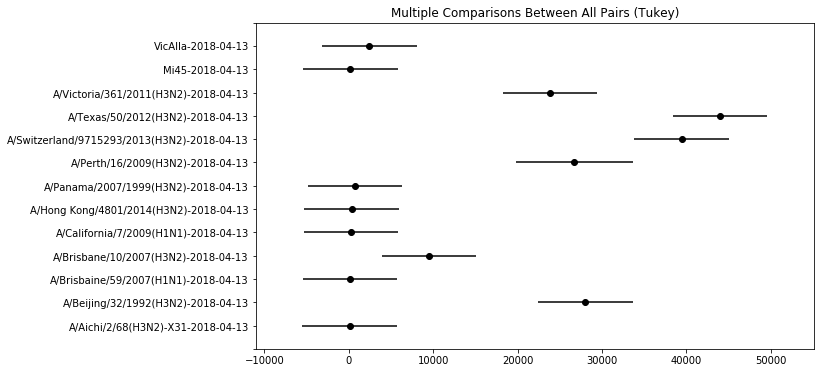

30


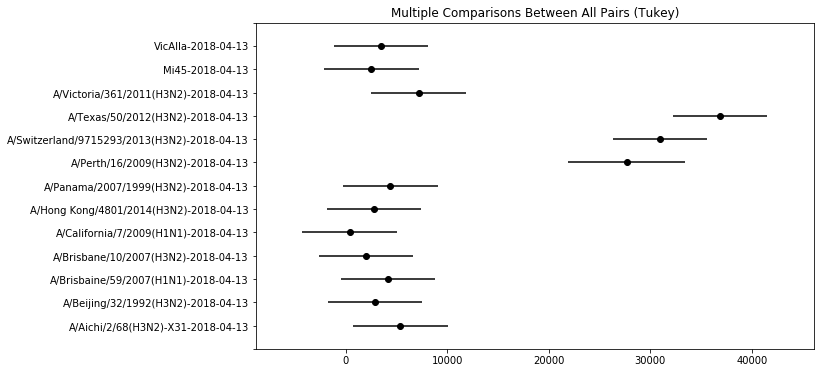

39


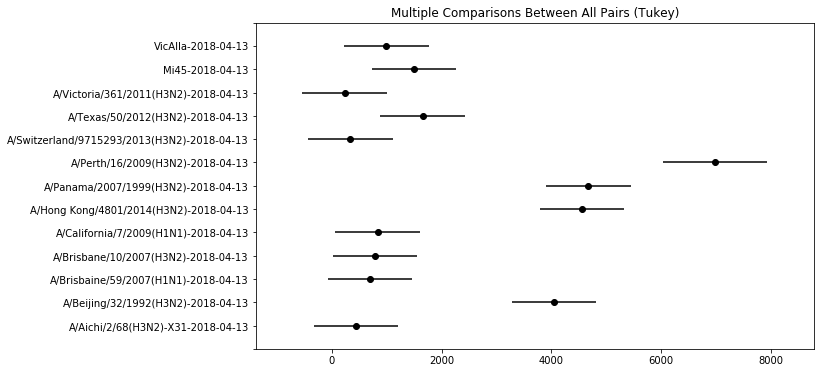

30


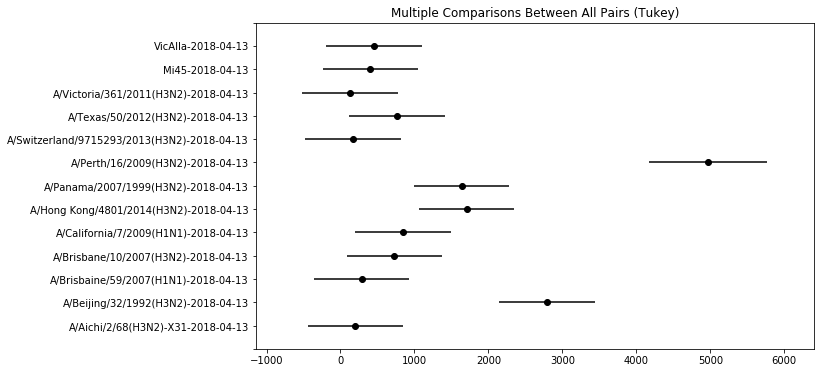

39


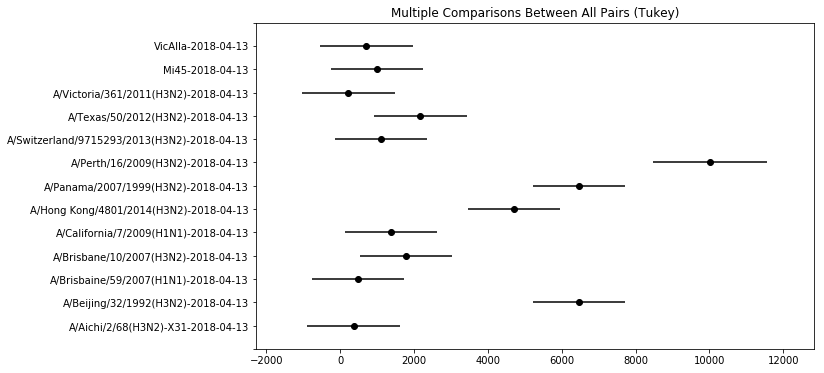

10


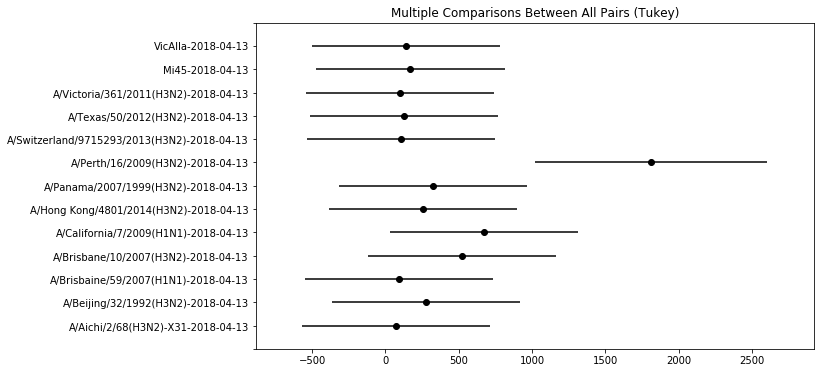

21


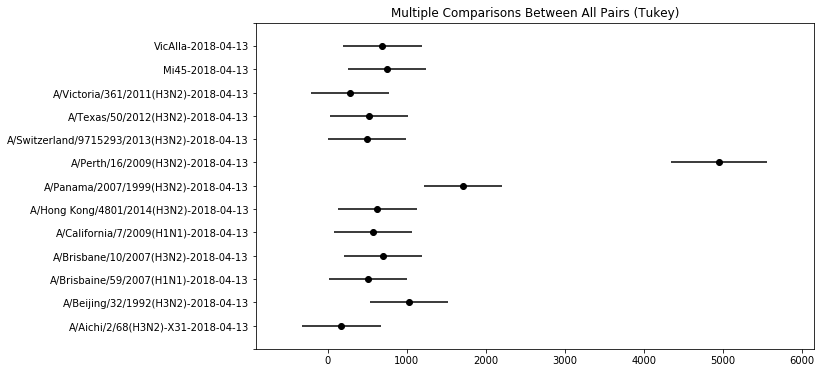

48


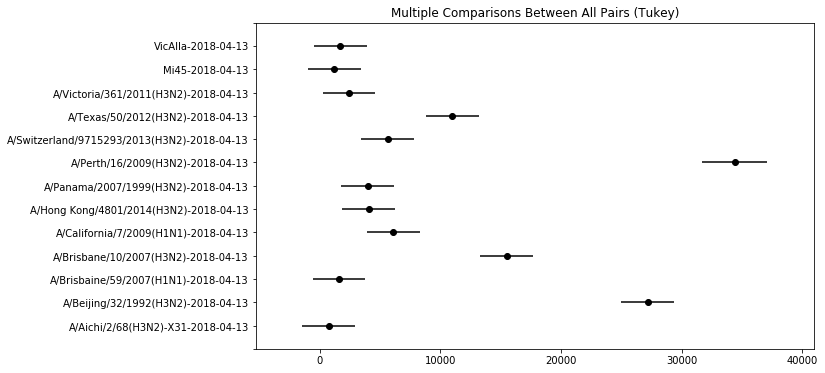

24


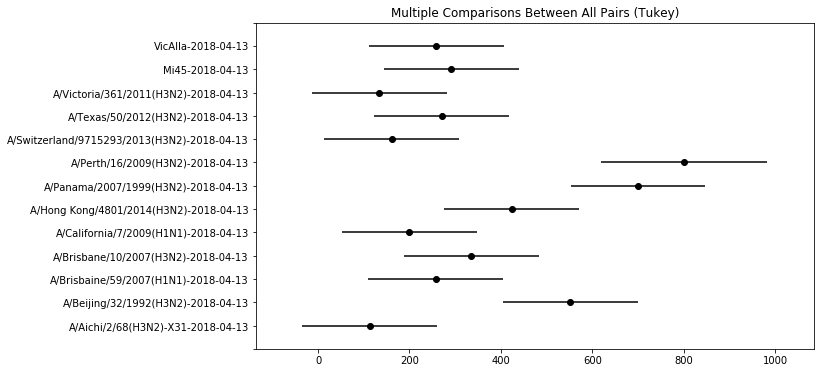

0


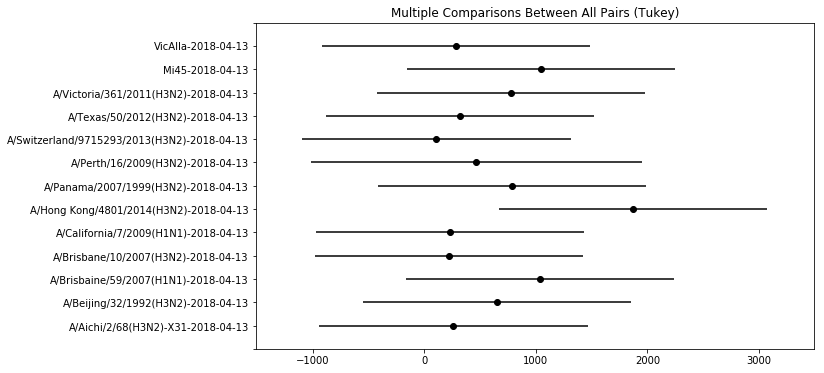

2


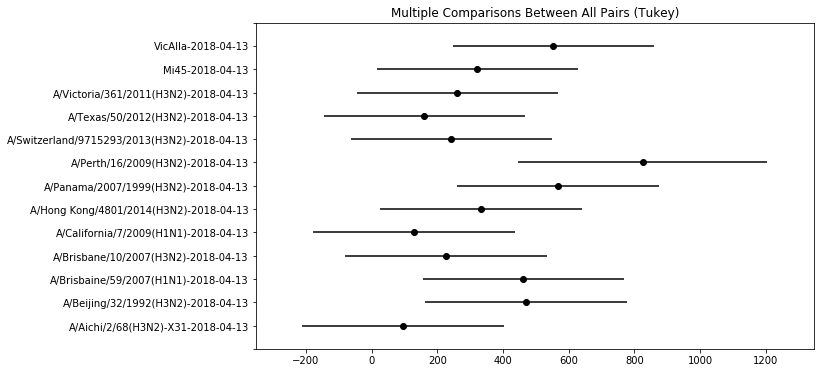

37


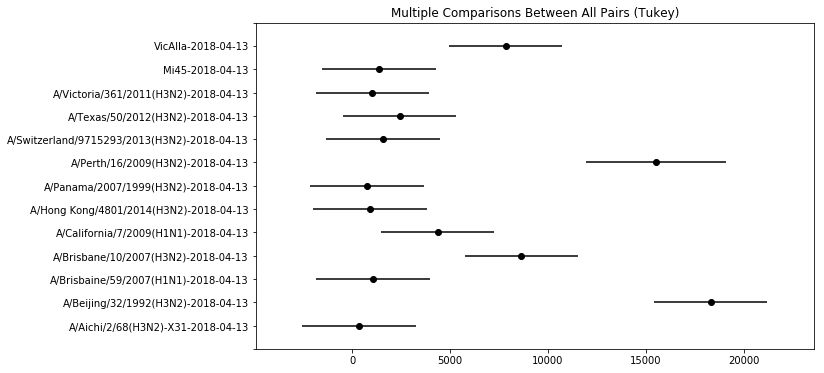

31


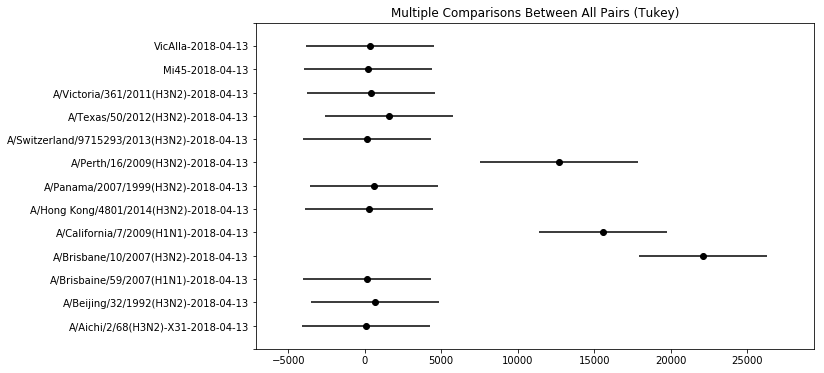

12


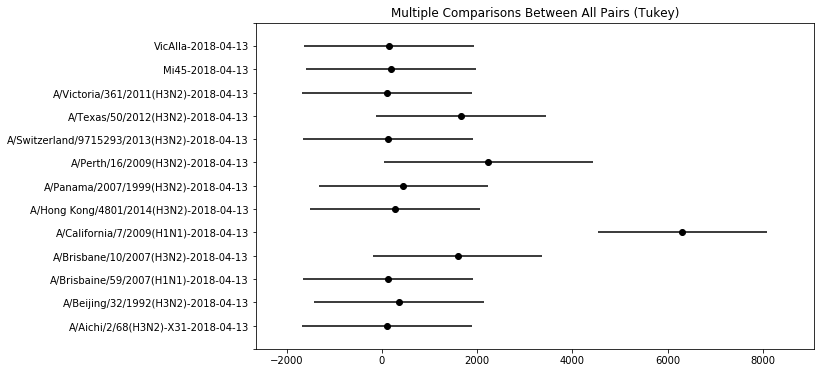

4


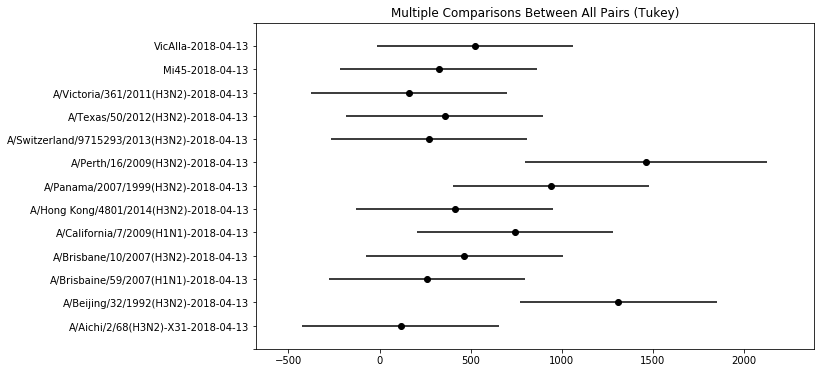

37


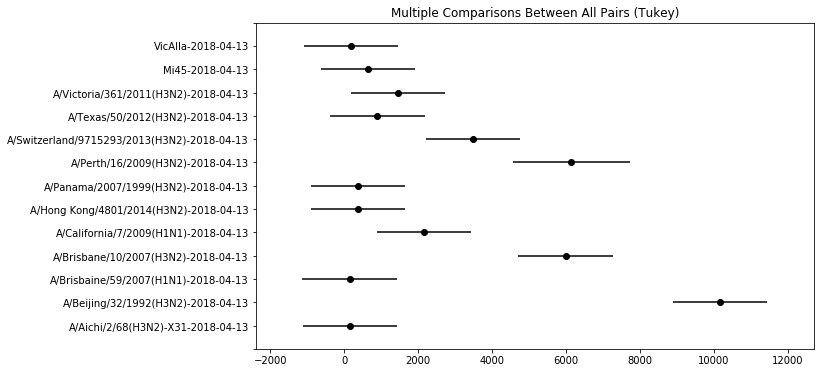

50


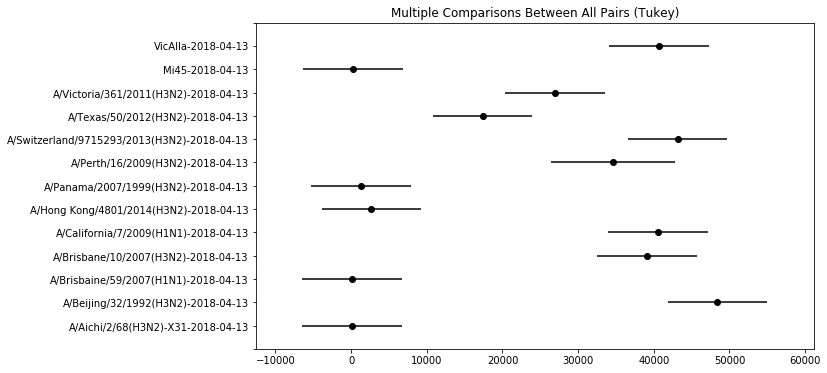

40


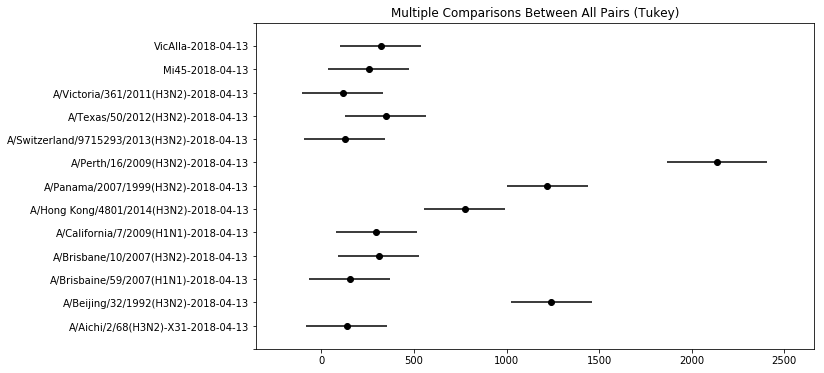

6


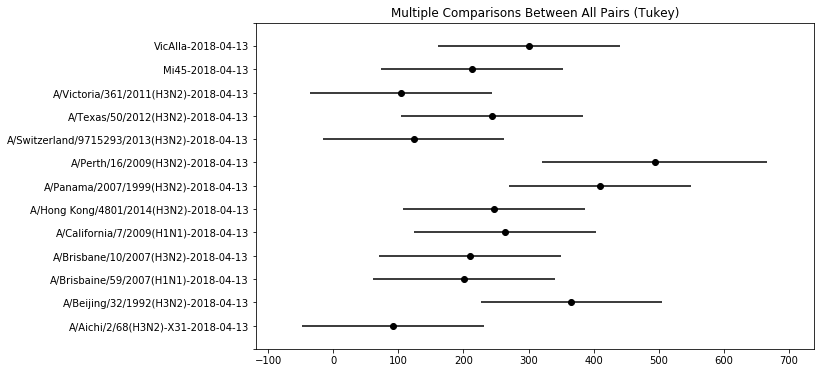

25


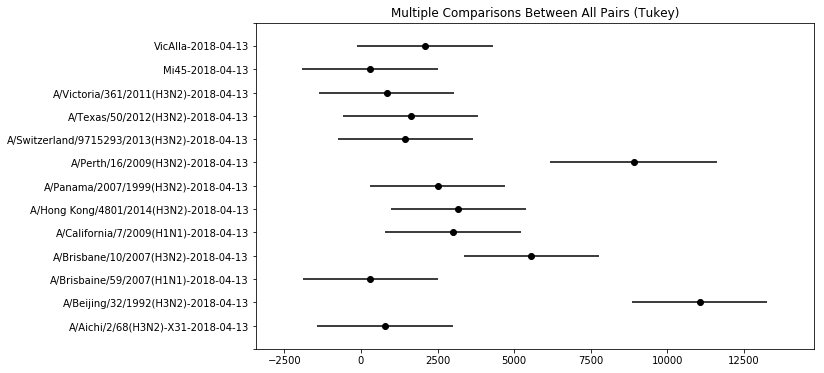

38


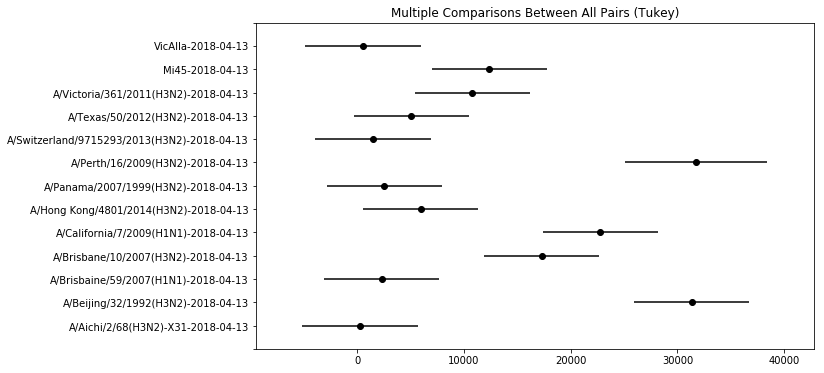

20


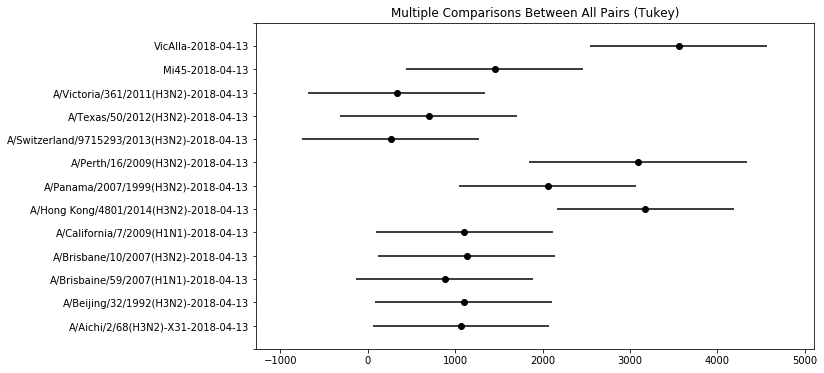

41


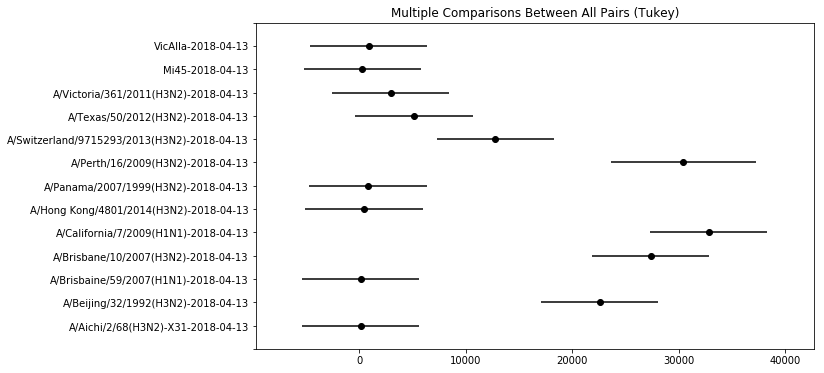

25


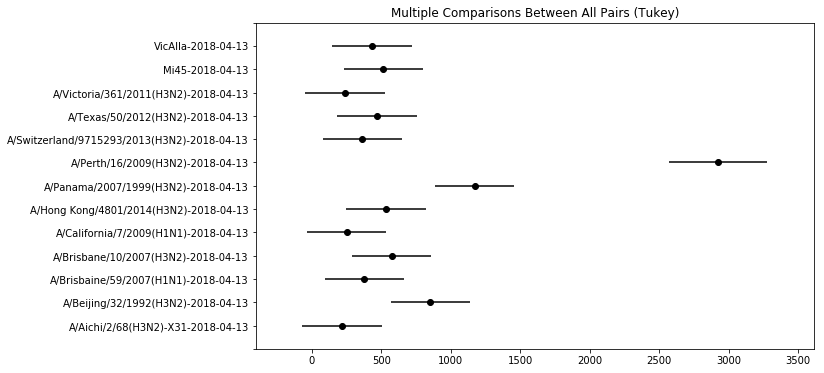

6


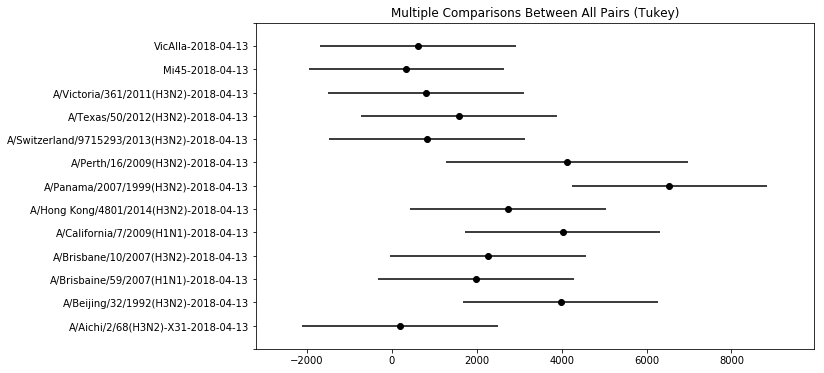

29


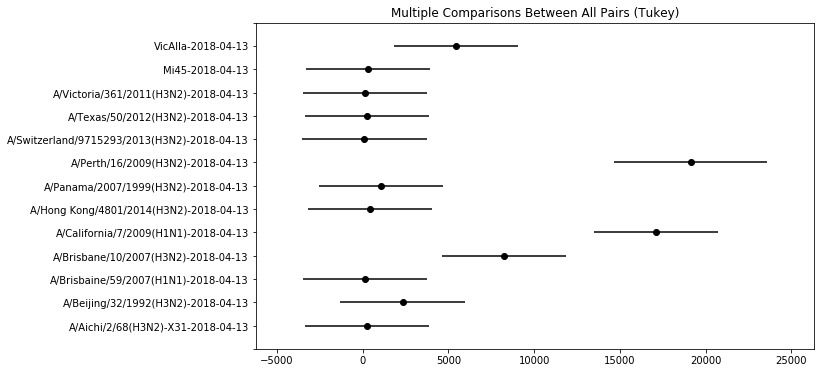

24


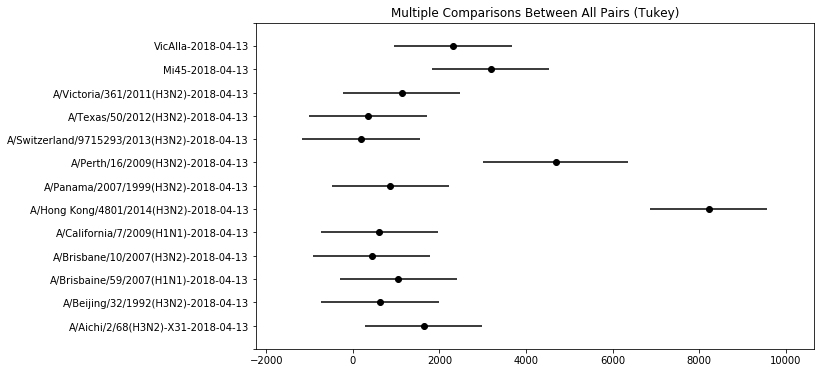

In [62]:
data_test = data.subset_ligand_batches(["P116"])
frames = []
for n, d in data.spots_pd.groupby("Ligand Batch"):
    
    tukey = pairwise_tukeyhsd(endog=d["Intensity"], groups=d["Analyte Batch"])
    summary =tukey.summary()
    print(np.count_nonzero(tukey.reject))
    frames.append(pd.Series({"Ligand Batch":n,"Distinct Groups":np.count_nonzero(tukey.reject)}))
    tukey.plot_simultaneous()
    plt.show()

In [65]:
pepsig = pd.concat(frames, axis=1).transpose().sort_values(by="Distinct Groups", ascending=False)
pd.Series(pepsig["Distinct Groups"].values,index=pepsig["Ligand Batch"])

Ligand Batch
P125         50
P116         48
P102         46
P084         45
Nenad        42
P132         41
P127         40
P100         39
P104         39
P106         39
P071         38
P131.1       38
P070         37
P124         37
P120         37
P063         37
P073         36
P043         34
P069         34
P061         32
P065         32
P099         31
P121         31
P055         30
P044         30
P103         30
P105         30
P135         29
P082         29
LF-0.1       28
             ..
P007         13
P122         12
P081         12
P095         12
P094         12
P010         12
P013         12
P054         12
P086         12
P089         12
P114         10
P045.3       10
P047          9
P075          8
P128          6
P134          6
P076          6
P008          4
P123          4
P119          2
LF-0.01       0
LF-0.05       0
LF-0.5        0
P118          0
P009          0
P091          0
LF-0.001      0
P072          0
P074          0
LF-0.0001     0
Length: 85,

/home/janek89/Envs/flutype_webapp/lib/python3.5/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


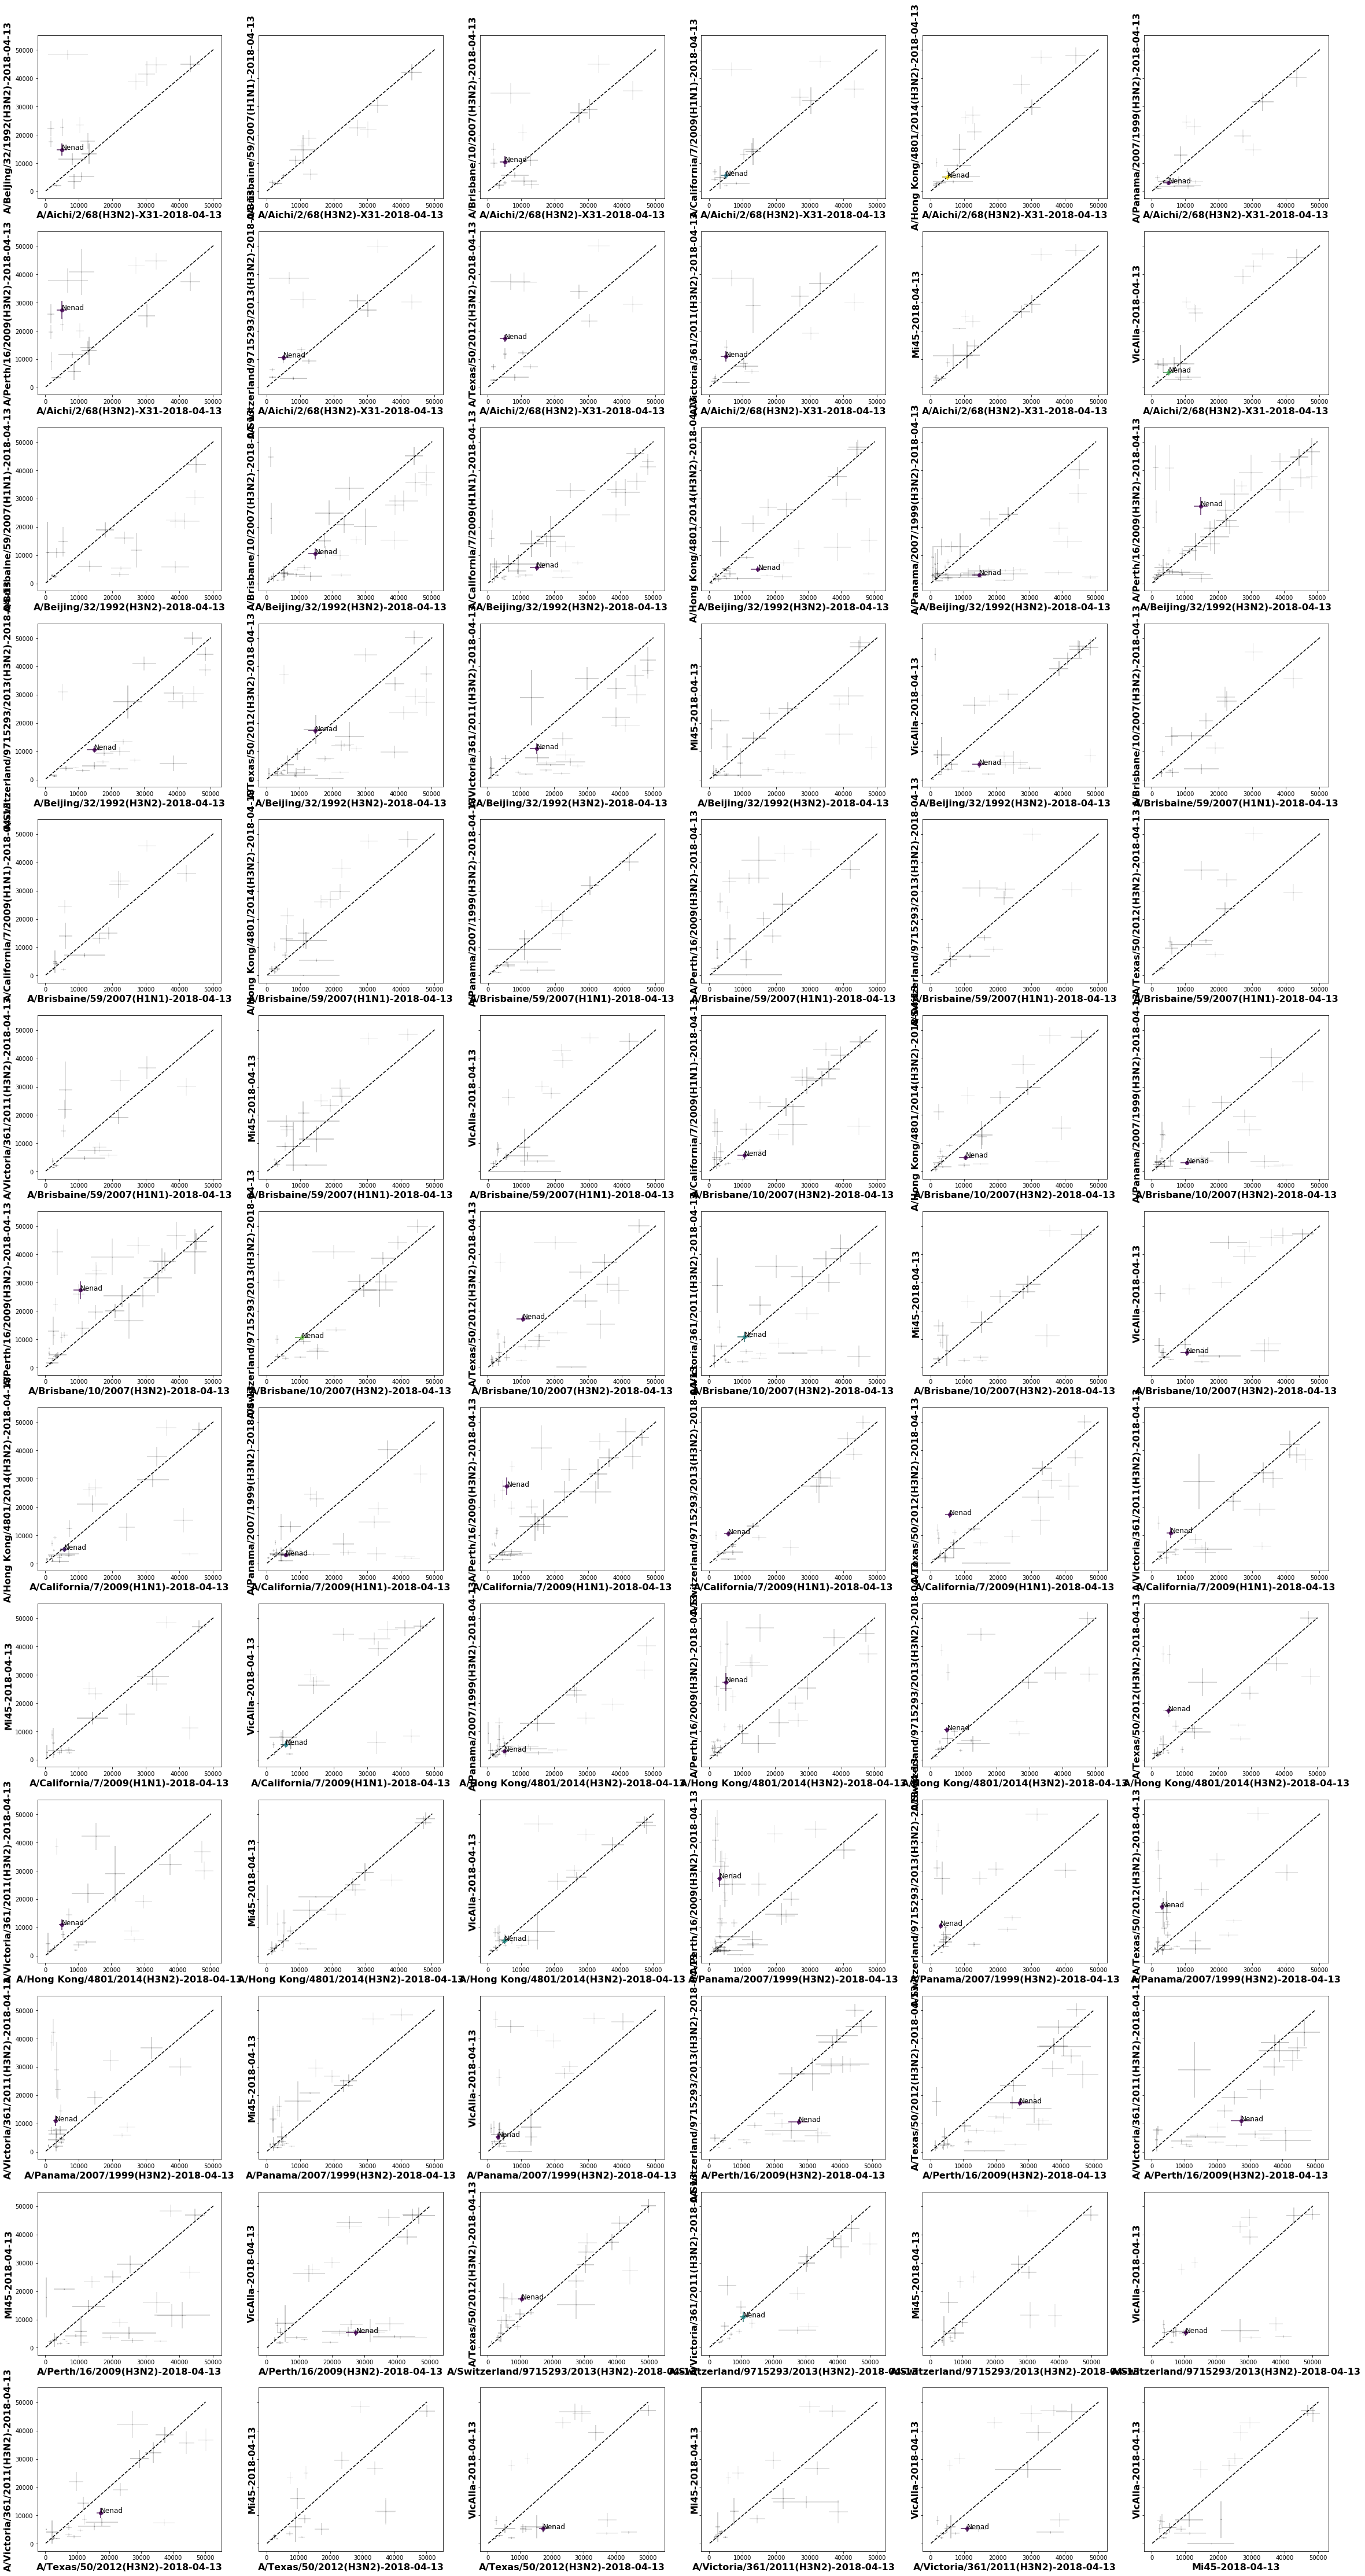

In [65]:
fig, axes = plt.subplots(ncols=6,nrows=13, figsize = (40,80), sharey=True)

ax_it = iter(axes.flatten())
peptide_c_signif.dropna(inplace=True)
cmap = cm.viridis
for name, d in peptide_c_signif.groupby("Analyte Batches"):
    x = y = np.linspace(peptide_c_signif.V1_I.min(),peptide_c_signif.V1_I.max())
    ax = next(ax_it)
    ax.plot(x,y,linestyle="--",marker=" ", c="k", alpha=1)
    #ax.set_title("{} vs. {}".format(name[1],name[0]), size = 20)
    ax.set_xlabel(name[0], size = 16, weight = 'bold')
    ax.set_ylabel(name[1], size = 16, weight = 'bold')
    #ax.set_xlim(0,x.max())
    #ax.set_ylim(0,y.max())

    
    #ax.set_xscale("log")
    #ax.set_yscale("log")



    #norm = Normalize(d.Significance.min(),d.Significance.max())
    d.sort_values("Significance",ascending=False, inplace=True)
    boundary = 0.15
    #d_selected = d[d["Significance"] < boundary]
    #d_n = d[d["Significance"] > boundary]
    
    
    d_n = d
    
    #d_selected = d.loc[d["Peptide"].isin(["Pep_80","Pep_43","Pep_55","Pep_56","Pep_59","Pep_61","Pep_63","Pep_83","Pep_94","Pep_95","Pep_98","Pep_100","Pep_102","Pep_103","Pep_121" ,"Pep_125","Pep_131.2","Nenad","Pep_49","Pep_50"])]
    d_selected = d.loc[d["Ligand Batch"].isin(["Nenad"])]
    #d_selected = d.loc[d["Peptide"].isin(["Pep_43","Pep_55","Pep_56","Pep_59","Pep_63","Pep_131.2"])]


    

    alphas = iter(np.linspace(0.3,0.05,len(d)))
    

    for ii, dp in d_selected.iterrows():
        #if dp.Significance is not np.NaN:
            c = cmap(dp.Significance)
            ax.errorbar(x=dp.V1_I,y=dp.V2_I,xerr=dp.V1_Err,yerr=dp.V2_Err, c = c, fmt="o",linestyle="",alpha=0.8, capthick=2)
            ax.annotate(dp["Ligand Batch"],(dp.V1_I+0.01,dp.V2_I+0.01), size=12)
    
    for ii, dp in d_n.iterrows():
        c = cmap(dp.Significance)
        ax.errorbar(x=dp.V1_I,y=dp.V2_I,xerr=dp.V1_Err,yerr=dp.V2_Err, c = "k", fmt="o",linestyle="",alpha=next(alphas), ms = 0.5, capthick=1)
        
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    uri_name1 = name[0].replace("/","-")
    uri_name2 = name[1].replace("/","-")


#plt.savefig(directory+"all_correlations.png", bbox_inches="tight")    
plt.show()    

In [71]:
peptide_c_signif[peptide_c_signif["Ligand Batch"]=="P084"].sort_values(by="Significance")

Ligand Batch                                    Analyte Batches  \
368          P084  (A/Beijing/32/1992(H3N2)-2018-04-13, A/Hong Ko...   
412          P084  (A/Beijing/32/1992(H3N2)-2018-04-13, A/Panama/...   
1620         P084  (A/Hong Kong/4801/2014(H3N2)-2018-04-13, A/Swi...   
1842         P084  (A/Panama/2007/1999(H3N2)-2018-04-13, A/Switze...   
1240         P084  (A/California/7/2009(H1N1)-2018-04-13, A/Hong ...   
1279         P084  (A/California/7/2009(H1N1)-2018-04-13, A/Panam...   
1649         P084  (A/Hong Kong/4801/2014(H3N2)-2018-04-13, A/Tex...   
1875         P084  (A/Panama/2007/1999(H3N2)-2018-04-13, A/Texas/...   
653          P084  (A/Beijing/32/1992(H3N2)-2018-04-13, VicAlla-2...   
1680         P084  (A/Hong Kong/4801/2014(H3N2)-2018-04-13, A/Vic...   
2275         P084  (A/Switzerland/9715293/2013(H3N2)-2018-04-13, ...   
1913         P084  (A/Panama/2007/1999(H3N2)-2018-04-13, A/Victor...   
967          P084  (A/Brisbane/10/2007(H3N2)-2018-04-13, A/Hong K...   
1493         P084  (A/California/7/2009(H1N1)-2018-04-13, VicAlla...   
1003         P084  (A/Brisbane/10/2007(H3N2)-2018-04-13, A/Panama...   
2355         P084  (A/Texas/50/2012(H3N2)-2018-04-13, VicAlla-201...   
1574         P084  (A/Hong Kong/4801/2014(H3N2)-2018-04-13, A/Per...   
1786         P084  (A/Panama/2007/1999(H3N2)-2018-04-13, A/Perth/...   
618          P084  (A/Beijing/32/1992(H3N2)-2018-04-13, Mi45-2018...   
521          P084  (A/Beijing/32/1992(H3N2)-2018-04-13, A/Switzer...   
2406         P084  (A/Victoria/361/2011(H3N2)-2018-04-13, VicAlla...   
553          P084  (A/Beijing/32/1992(H3N2)-2018-04-13, A/Texas/5...   
2254         P084  (A/Switzerland/9715293/2013(H3N2)-2018-04-13, ...   
279          P084  (A/Beijing/32/1992(H3N2)-2018-04-13, A/Brisban...   
1210         P084  (A/Brisbane/10/2007(H3N2)-2018-04-13, VicAlla-...   
1463         P084  (A/California/7/2009(H1N1)-2018-04-13, Mi45-20...   
2            P084  (A/Aichi/2/68(H3N2)-X31-2018-04-13, A/Beijing/...   
2162         P084  (A/Perth/16/2009(H3N2)-2018-04-13, VicAlla-201...   
2327         P084  (A/Texas/50/2012(H3N2)-2018-04-13, Mi45-2018-0...   
151          P084  (A/Aichi/2/68(H3N2)-X31-2018-04-13, A/Switzerl...   
...           ...                                                ...   
924          P084  (A/Brisbane/10/2007(H3N2)-2018-04-13, A/Califo...   
2122         P084  (A/Perth/16/2009(H3N2)-2018-04-13, Mi45-2018-0...   
187          P084  (A/Aichi/2/68(H3N2)-X31-2018-04-13, A/Victoria...   
322          P084  (A/Beijing/32/1992(H3N2)-2018-04-13, A/Califor...   
1525         P084  (A/Hong Kong/4801/2014(H3N2)-2018-04-13, A/Pan...   
1399         P084  (A/California/7/2009(H1N1)-2018-04-13, A/Texas...   
43           P084  (A/Aichi/2/68(H3N2)-X31-2018-04-13, A/Brisbane...   
1981         P084  (A/Panama/2007/1999(H3N2)-2018-04-13, VicAlla-...   
1369         P084  (A/California/7/2009(H1N1)-2018-04-13, A/Switz...   
127          P084  (A/Aichi/2/68(H3N2)-X31-2018-04-13, A/Perth/16...   
1747         P084  (A/Hong Kong/4801/2014(H3N2)-2018-04-13, VicAl...   
1941         P084  (A/Panama/2007/1999(H3N2)-2018-04-13, Mi45-201...   
1707         P084  (A/Hong Kong/4801/2014(H3N2)-2018-04-13, Mi45-...   
1431         P084  (A/California/7/2009(H1N1)-2018-04-13, A/Victo...   
1325         P084  (A/California/7/2009(H1N1)-2018-04-13, A/Perth...   
1093         P084  (A/Brisbane/10/2007(H3N2)-2018-04-13, A/Switze...   
1155         P084  (A/Brisbane/10/2007(H3N2)-2018-04-13, A/Victor...   
106          P084  (A/Aichi/2/68(H3N2)-X31-2018-04-13, A/Panama/2...   
1122         P084  (A/Brisbane/10/2007(H3N2)-2018-04-13, A/Texas/...   
84           P084  (A/Aichi/2/68(H3N2)-X31-2018-04-13, A/Hong Kon...   
1051         P084  (A/Brisbane/10/2007(H3N2)-2018-04-13, A/Perth/...   
2200         P084  (A/Switzerland/9715293/2013(H3N2)-2018-04-13, ...   
2430         P084              (Mi45-2018-04-13, VicAlla-2018-04-13)   
2302         P084  (A/Texas/50/2012(H3N2)-201

In [69]:
peptide_c_signif.groupby("Ligand Batch").apply(lambda x: x["Significance"].min()).sort_values()

Ligand Batch
P084      5.493943e-45
P055      4.261089e-43
P116      2.248574e-42
P056      6.715651e-42
P103      5.328310e-37
P095      3.624353e-36
Nenad     4.311728e-35
P120      1.615829e-34
P059      2.604975e-33
P098      1.252241e-31
P125      2.691845e-31
P094      1.992645e-30
P124      3.155571e-28
P043      4.761997e-28
P100      2.409461e-27
P073      4.325237e-27
P082      8.440890e-26
P080      1.085548e-24
P106      1.305040e-23
P131.1    1.008519e-22
P121      1.151910e-22
P102      9.694864e-22
P132      4.749624e-21
P069      3.613313e-20
P136      1.845444e-19
P105      1.041879e-18
P130      1.013107e-17
P010      2.170166e-17
P099      3.359271e-17
P135      4.954036e-15
              ...     
P090      5.125478e-10
P115      7.123438e-09
P061      1.308017e-08
P081      4.469893e-08
P131.2    4.929625e-08
P050      9.780481e-08
P134      3.075490e-07
P127      3.449973e-07
P072      1.839199e-06
P101      2.981630e-06
P083      5.735376e-06
P086      1.757314e-0